## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes).
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [53]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

! pip install zipcodes

# Install GraphViz system package and pydotplus if not already installed
! pip install graphviz pydotplus


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to help with labeling zip codes by neighborhood
#https://pypi.org/project/zipcodes/
import zipcodes

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to help with decision tree visualization
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image, display




# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [54]:
#Loading the dataset
df = pd.read_csv("Loan_Modelling.csv")

# Making a copy of the dataframe to avoid modifying the original data
data = df.copy()

## Data Overview

* Observations
* Sanity checks

In [55]:
# Display the first 5 rows of the dataset
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

* The ID looks to just be a unique identifier that doesn't add value to the data analysis we look later at potentialyl dropping this.
* The Categorical values seem to be proprly mapped to numbers which saves us time at least for now on needign to do one hot encoding.

In [56]:
data.shape

(5000, 14)

* There are 5000 rows and 14 columns in the data set.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All of the values are mapped to either integers or floats, so as stated previously it saves us from needing to do one hot encoding at this time.

In [58]:
# Check for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [59]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [60]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

* There are not any missing values
* There are not any na values
* There are not any duplicated values in the dataset.

In [61]:
# Check for unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

* There are 5000 unique ids that don't contribute to the data analysis, we'll drop these during the data treatment
* There are a TON of unique zip codes at 467, so we'll want to consider having a better way to simplify the grouping of these values as this represents entirely too many categories to account for in our decision tree model.
* Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard correctly have 2 unique values that line up with true/false indicating if the customer has that type of account status or not.
* Education has 3 values each corresponding to the level of education.

In [62]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* The thing that stands out immediately is that Experience has a minimum value of -3 so this is potentially a data entry mistake. Let's fix this first so the Experience values are listed as positive integers since it does not make sense to have negative experience.
* The next thing that stands out is that not every customer has a mortgage which are skewing the mortgage values as it so we'll want to look into potentially splitting the data set for those that have mortgages vs those who do not especially during bi-variate data analysis.
* We will also drop the ID column since it won't add any value to the data analysis.

In [63]:
negativeExperienceCount = data[data['Experience'] < 0].count().sum()
print("Experience Values<0 Count Before Treatment", negativeExperienceCount)

# Replace negative values in the 'Experience' column with abs values
data['Experience'] = data['Experience'].abs()

# Confirm that there are no negative values in the 'Experience' column
negativeExperienceCount = data[data['Experience'] < 0].count().sum()
print("Experience Values<0 Count After Treatment", negativeExperienceCount)

# Count the number of Mortgage values that are 0
mortgageZeroCount = data[data['Mortgage'] == 0].value_counts().sum()
print("Number of customers without mortgages", mortgageZeroCount)

#Count the number of Mortgage values that are greater than 0
mortgageGreaterThanZeroCount = data[data['Mortgage'] > 0].value_counts().sum()
print("Number of customers with mortgages", mortgageGreaterThanZeroCount)

#Drop the 'ID" field as it is not needed for analysis
data.drop(columns=['ID'], inplace=True)



Experience Values<0 Count Before Treatment 728
Experience Values<0 Count After Treatment 0
Number of customers without mortgages 3462
Number of customers with mortgages 1538


* There were 728 rows treated where the experience values was less than 0. All experience values are now positive.
* 3462 customers do not have a mortgage (meaning they are either renters or paid off their mortgage).
* 1538 of the customer have a mortgage.

In [64]:
# Rerun the describe function to see the updated statistics
data.describe().T


count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.134600    11.415189      0.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

* After cleaning up the data, we can see that the average work experience is ~11 years for the customers with the minimum work experience being 0 (probably for a new college grad), and a max of 43 years for experienced professionals (potentially closer to retirement age).
* The average age of the customer is 45 years of age, with the youngest customer being 23 and oldest being 55.
* The average income is ~73K with the max income at 224K and min income at 8K
* The average family size is ~2, with a min of 1 and max of 4.
* The average monthly credit card spend is ~1.9K, with min being 0 and max of 10K
* Looking at average, min, and max values on the mortgage values doesn't make as much sense at this time, since the majority of customers don't have a mortgage indicated by a value of 0. So this greatly skews property values for the averages and shows nonsensical. Those customers that don't have a mortgage could be renters or customers who have paid off their home mortgages previously.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Simplify the zip codes for EDA

In [65]:
#Add City, State, and County columns to the dataset and then evaluate which ones reduce the number of unique values in the 'ZIPCode' column
data['City'] = data['ZIPCode'].apply(lambda x: zipcodes.matching(str(x))[0]['city'] if zipcodes.matching(str(x)) else None)
data['State'] = data['ZIPCode'].apply(lambda x: zipcodes.matching(str(x))[0]['state'] if zipcodes.matching(str(x)) else None)
data['County'] = data['ZIPCode'].apply(lambda x: zipcodes.matching(str(x))[0]['county'] if zipcodes.matching(str(x)) else None)

#Get the unique values in the 'ZIPCode' column
unique_zipcodes = data['ZIPCode'].unique()
# Print the unique values
print("Unique Zip Codes: ", unique_zipcodes[:50])
# Print the count of unique values in the ZIPCode column
print("Unique Zip Codes Count: ", len(unique_zipcodes)) 


# Get the unique values in the 'City' column
unique_cities = data['City'].unique()
# Print the unique values
print("Unique Cities: ", unique_cities[:50])
# Print the count of unique values in the 'City' column
print("Unique Cities Count: ", len(unique_cities))

# Get the unique values in the 'State' column
unique_states = data['State'].unique()
# Print the unique values
print("Unique States: ", unique_states[:50])
# Print the count of unique values in the 'State' column
print("Unique States Count: ", len(unique_states))

# Get the unique values in the 'County' column
unique_counties = data['County'].unique()
# Print the unique values
print("Unique Counties: ", unique_counties[:50])
# Print the count of unique values in the 'County' column
print("Unique Counties Count: ", len(unique_counties))

Unique Zip Codes:  [91107 90089 94720 94112 91330 92121 91711 93943 93023 94710 90277 93106
 94920 91741 95054 95010 94305 91604 94015 90095 91320 95521 95064 90064
 94539 94104 94117 94801 94035 92647 95814 94114 94115 92672 94122 90019
 95616 94065 95014 91380 95747 92373 92093 94005 90245 95819 94022 90404
 93407 94523]
Unique Zip Codes Count:  467
Unique Cities:  ['Pasadena' 'Los Angeles' 'Berkeley' 'San Francisco' 'Northridge'
 'San Diego' 'Claremont' 'Monterey' 'Ojai' 'Redondo Beach' 'Santa Barbara'
 'Belvedere Tiburon' 'Glendora' 'Santa Clara' 'Capitola' 'Stanford'
 'Studio City' 'Daly City' 'Newbury Park' 'Arcata' 'Santa Cruz' 'Fremont'
 'Richmond' 'Mountain View' 'Huntington Beach' 'Sacramento' 'San Clemente'
 'Davis' 'Redwood City' 'Cupertino' 'Santa Clarita' 'Roseville' 'Redlands'
 'La Jolla' 'Brisbane' 'El Segundo' 'Los Altos' 'Santa Monica'
 'San Luis Obispo' 'Pleasant Hill' 'Thousand Oaks' 'Rancho Cordova'
 'San Jose' 'Reseda' 'Salinas' 'Cardiff By The Sea' 'Oakland' 'San

* I decided to use the Zipcodes python library to get more insights into the zip codes to see if there is opportunity for grouping and found the following after creating new columns.
    * All of the zip codes are mapped to the state of California so any targeting we recommend would be specific to this state. This isn't helpful when it comes to targeting where in California we can see potentially different grouping opportunities.
    * There are 467 unique zip codes which still entirely too many categories.
    * There are 245 unique cities which is roughly half the number of categories as zip code but still too large.
    * There are 39 unique counties which is significantly reduced number of categories from the 467 we started with.

* Including the newly created "County" column may aide in providing additional insights on group dynamics and has fewer values to work with than zip codes, or cities and reduces our categories from 467 down to 39 which is far more manageable. It also will allow us to more simply include this as part of our bi-variate Analysis.

In [66]:
# Drop the ZIPCode, City, and State columns in favor of the County column, as it has the least number of unique values and makes data analysis easier
dropped_columns = ['ZIPCode', 'City', 'State']
data.drop(columns=dropped_columns, axis =1, inplace=True)

#Strip leading and trailing whitespace from all the rows in County column
data['County'] = data['County'].str.strip()

# Show the new data columns thus far
data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard                County  
0                   1           0       0           0    Los Angeles County  
1                   1           0       0           0    Los Angeles County  
2                   0           0       0           0        Alameda County  
3                   0           0       0           0  San Francisco County  
4                   0           0       0           1    Los Angeles County

## Univariate Analysis

### Age Analysis

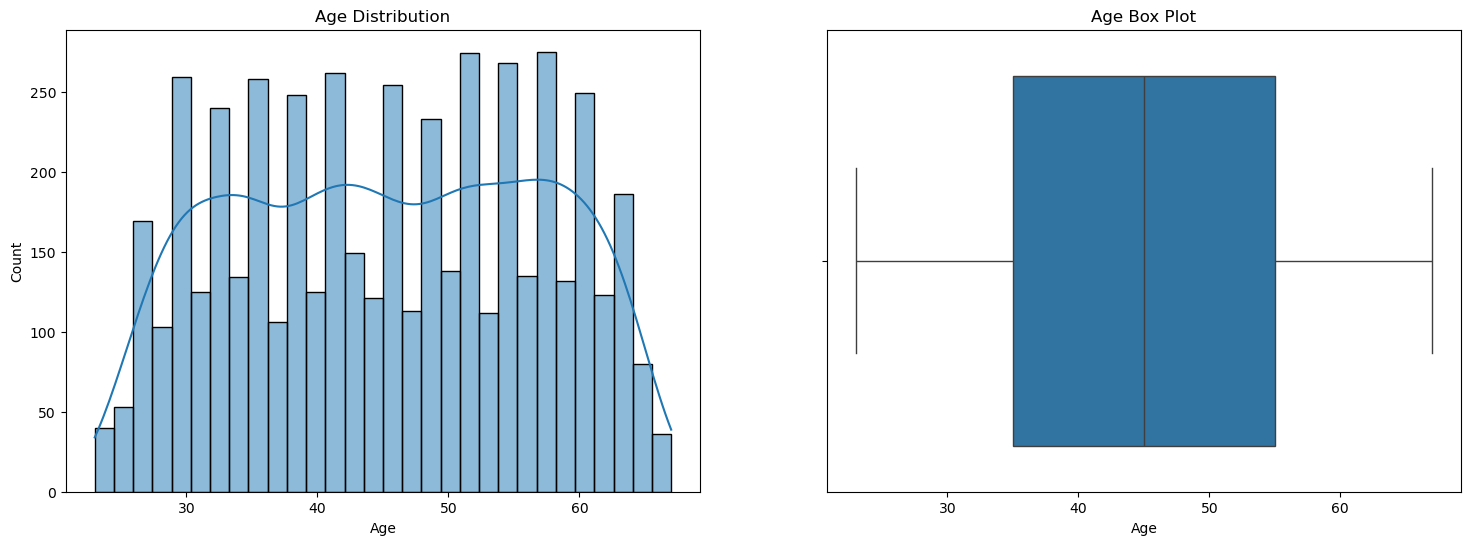

In [67]:
# Plot a box plot of the 'Age' column and histogram to visualize the distribution of ages
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Age'])
plt.title('Age Box Plot')
plt.show()

* The age is more or less normally distributed
* There are no outliers in age
* The majority of the customers are approximately between the ages of 35 and 55

### Income Analysis

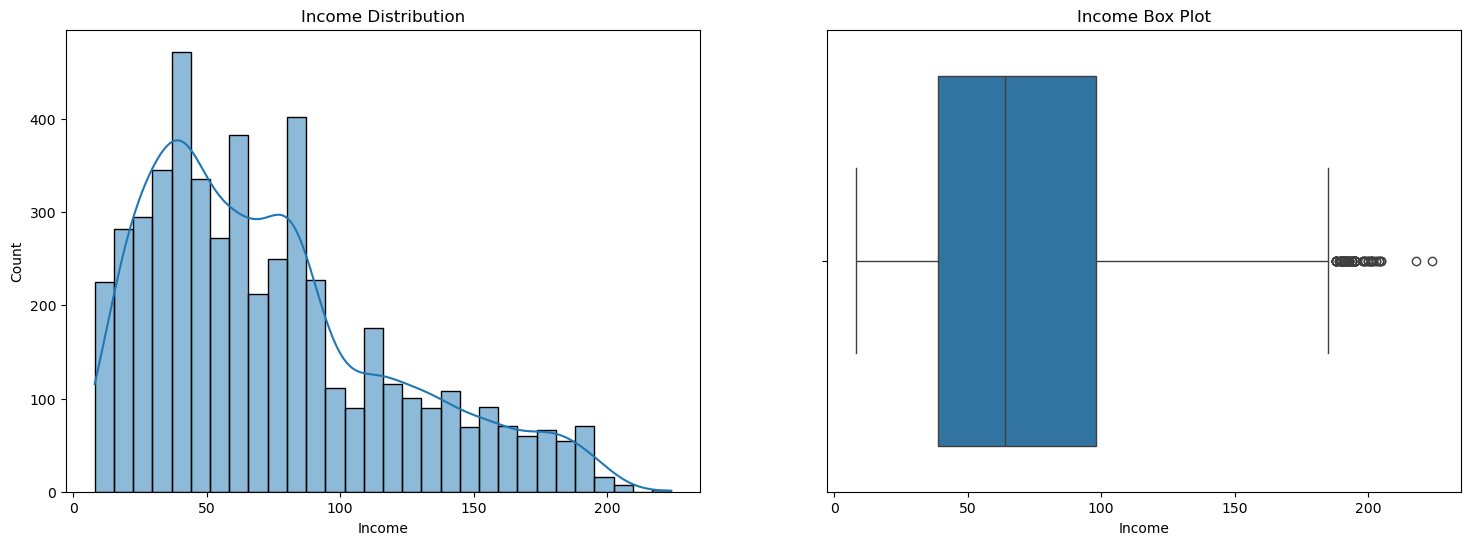

In [68]:
# Plot a box plot of the 'Income' column and histogram to visualize the distribution of incomes
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Income'])
plt.title('Income Box Plot')
plt.show()

* The income distribution is right-skewed, indicating most customers have lower to mid-range incomes, with a few high-income outliers.
* The box plot shows the presence of outliers on the higher end of the income range >~180K
* Most customers have an annual income below $100K, but there are some with significantly higher incomes.

### Family Analysis

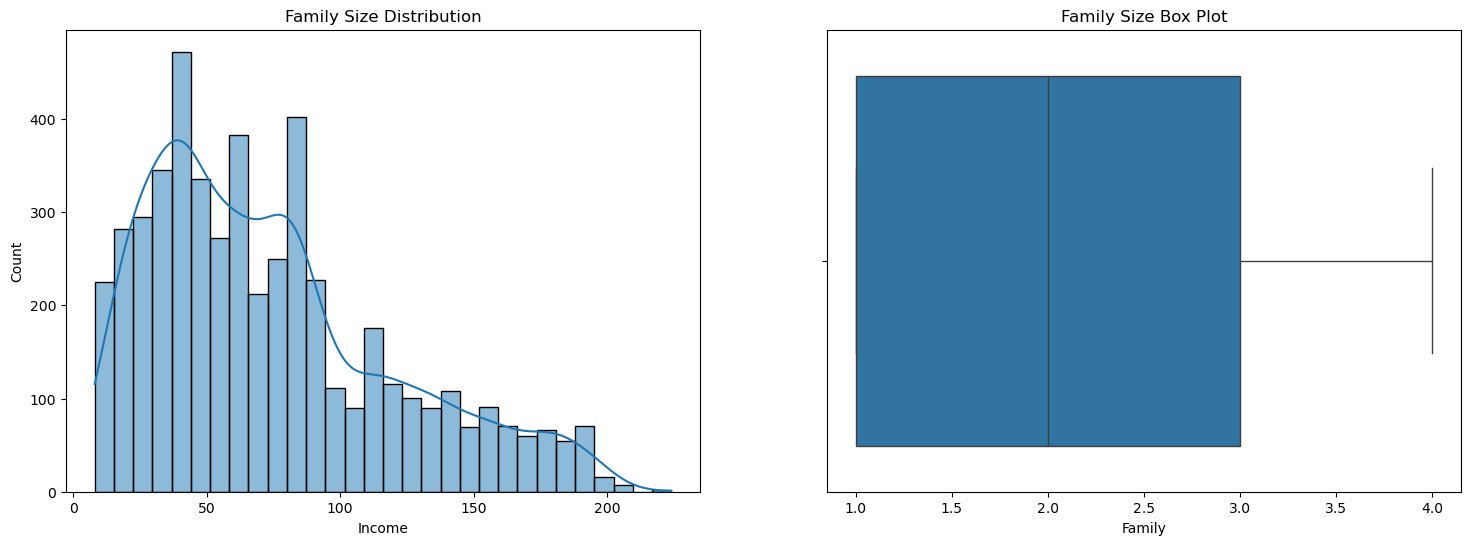

In [69]:
# Plot a box plot of the 'Faimly' column and histogram to visualize the distribution of family sizes
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Family Size Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Family'])
plt.title('Family Size Box Plot')
plt.show()

* Family size is right skwewed
* Most people have 3 people or less within their families
* There are no outliers


### Credit Card Average Analysis

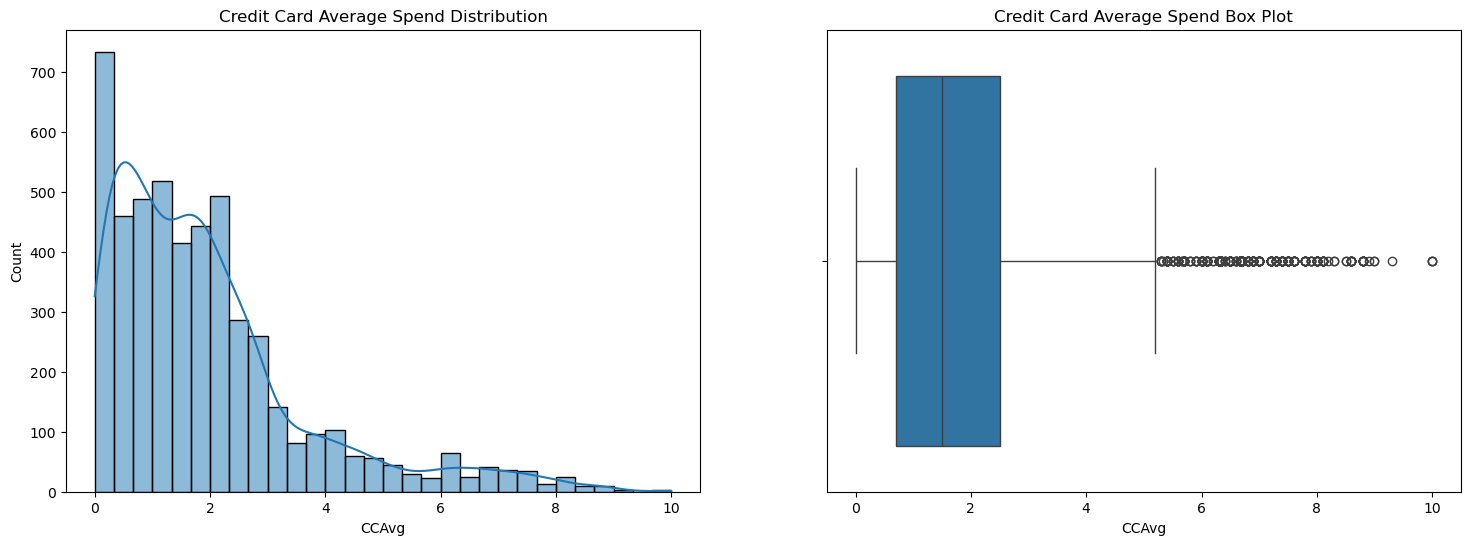

Number of customers who do not have a Credit Card: 106
Number of customers who have a Credit Card: 4860
Percentage of customers who do not have a Credit Card: 2.12%
Percentage of customers who have a Credit Card: 97.20%


In [70]:
# Plot a box plot of the 'CC Avg' column and histogram to visualize the monthly credit card average spend
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['CCAvg'], bins=30, kde=True)
plt.title('Credit Card Average Spend Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['CCAvg'])
plt.title('Credit Card Average Spend Box Plot')
plt.show()

# Print the number of customers who have CCAVG = 0 which indicates that they do not own a credit card.
ccAvgZeroCount = data[data['CCAvg'] == 0].value_counts().sum()
print("Number of customers who do not have a Credit Card:", ccAvgZeroCount)

# Print the number of customers who have CCAvg greater than 0 which indicates that they own at least one credit card.
ccAvgGreaterThanZeroCount = data[data['CCAvg'] > 0].value_counts().sum()
print("Number of customers who have a Credit Card:", ccAvgGreaterThanZeroCount)

# Print the percentage of customers who do not have a credit card
ccAvgZeroPercentage = (ccAvgZeroCount / data.shape[0]) * 100
print(f"Percentage of customers who do not have a Credit Card: {ccAvgZeroPercentage:.2f}%")

# Print the percentage of customers who have a credit card
ccAvgPercentage = (ccAvgGreaterThanZeroCount / data.shape[0]) * 100
print(f"Percentage of customers who have a Credit Card: {ccAvgPercentage:.2f}%")


* Credit card average spending is right skewed
* The majority of customers spend ~2200 or less on their credit card per month
* There are a number of outliers where users spend more than 5000 on their credit card per month. The largest outlier has a customer who spends 10K on their credit card.
* 106 (2.12%) customers do not have a credit card
* 4860 (97.20%) customers own a credit card
* Note that we cannot use the CreditCard field to calculate this as that field only tells us if they own credit cards outside of this bank.

### Education Level Analysis

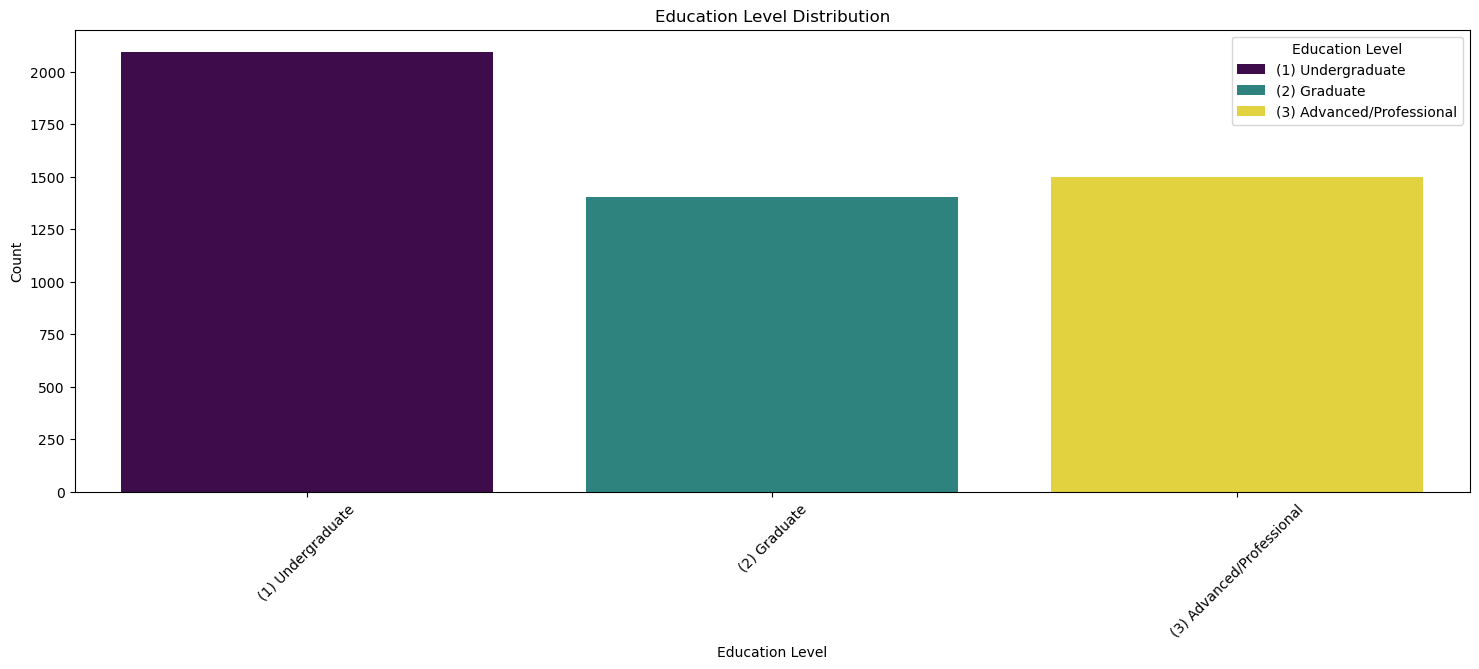

In [71]:
# Plot a count plot of the 'Education' column and histogram to visualize the distribution of Education levels
plt.figure(figsize=(18, 6))
sns.countplot(x='Education', data=data, hue='Education', palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['(1) Undergraduate', '(2) Graduate', '(3) Advanced/Professional'])

#Adding legend and labels for Education levels
plt.legend(title='Education Level', loc='upper right', labels=['(1) Undergraduate', '(2) Graduate', '(3) Advanced/Professional'])

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

* Over 2000 have their undergraduate degree
* Over 1250 of the customers have their graduate degree
* 1500 customers have an advanced/professional degree
* 2750 customers, which is the majority of the customers, have a graduate degree or higher.

### Mortgage Value Analysis

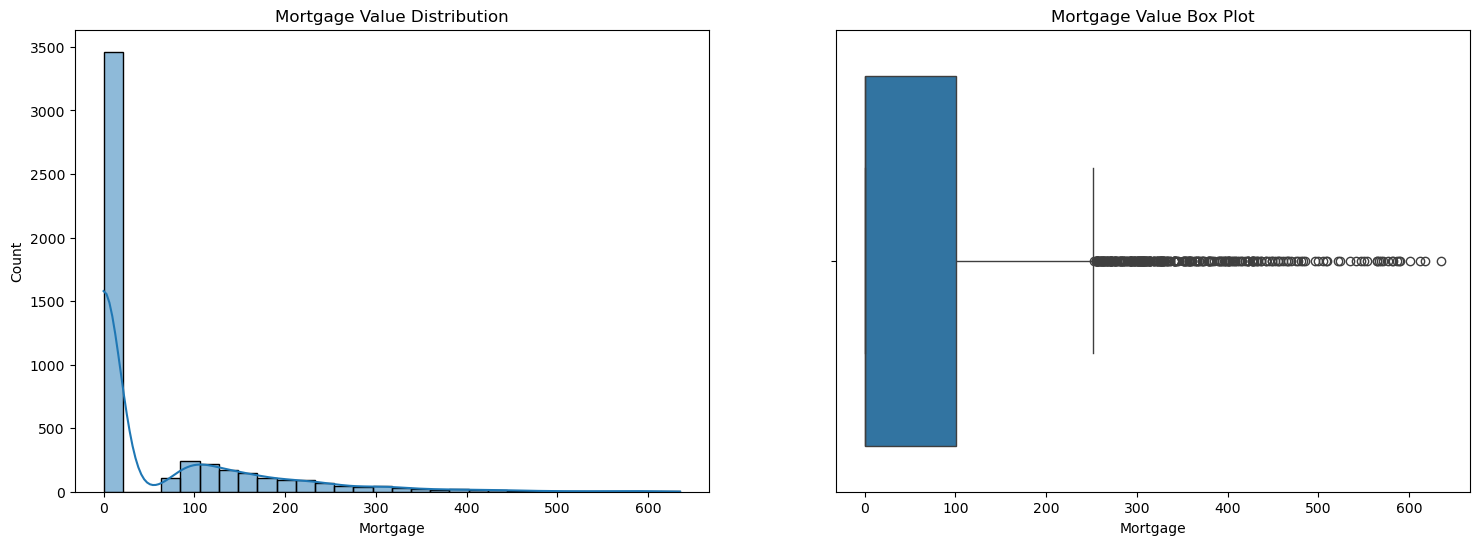

<Figure size 640x480 with 0 Axes>

In [72]:
# Plot a box plot of the 'Mortgage' column and histogram to visualize the distribution of mortgage amounts
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title('Mortgage Value Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Mortgage'])
plt.title('Mortgage Value Box Plot')

plt.show()
plt.tight_layout()



* The Mortgage value is right skewed
* Most of the homes have a valuation of 100K or less
* There are a number of outliers in home valuation where the houses are valued at over 250K
* The most expensive house is valued at over 600K

### Experience Analysis

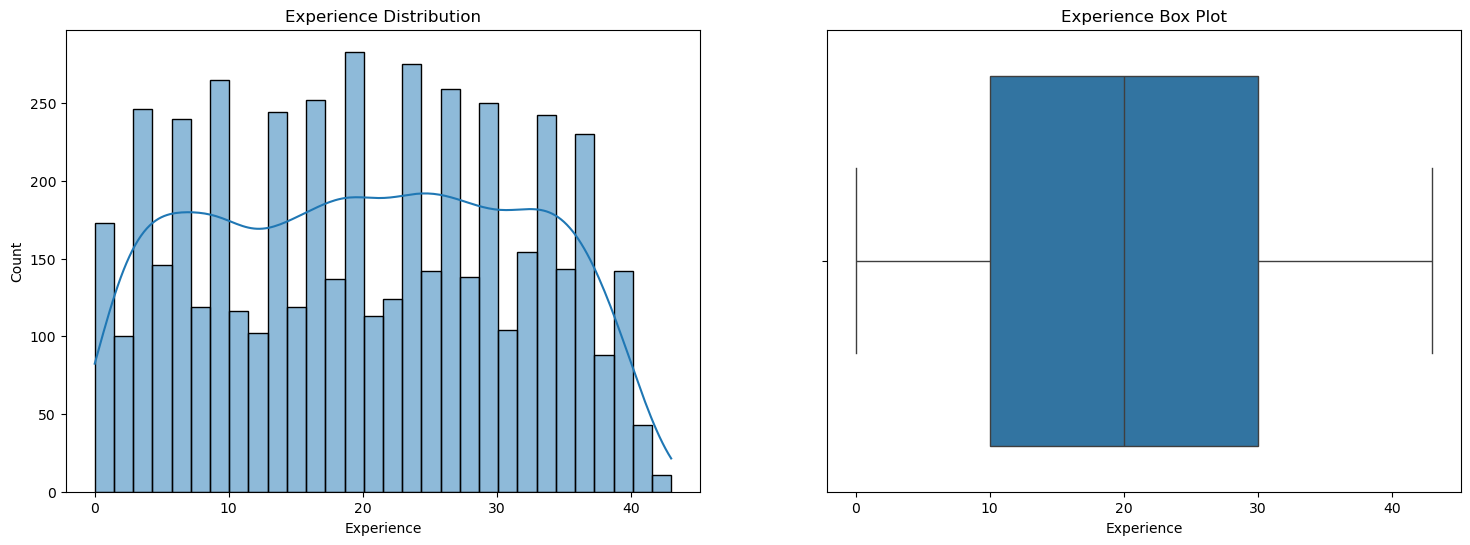

In [73]:
 # Plot a box plot of the 'Experience' column and histogram to visualize the distribution of number of years of experience
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Experience'], bins=30, kde=True)
plt.title('Experience Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Experience'])
plt.title('Experience Box Plot')
plt.show()

* The number of years of experience is more or less normally distributed.
* The majority of the customers have between 10 to 30 years of work experience, which suggests many customer are mid-career level professionls.
* There are no outliers.


### Personal Loan Analysis

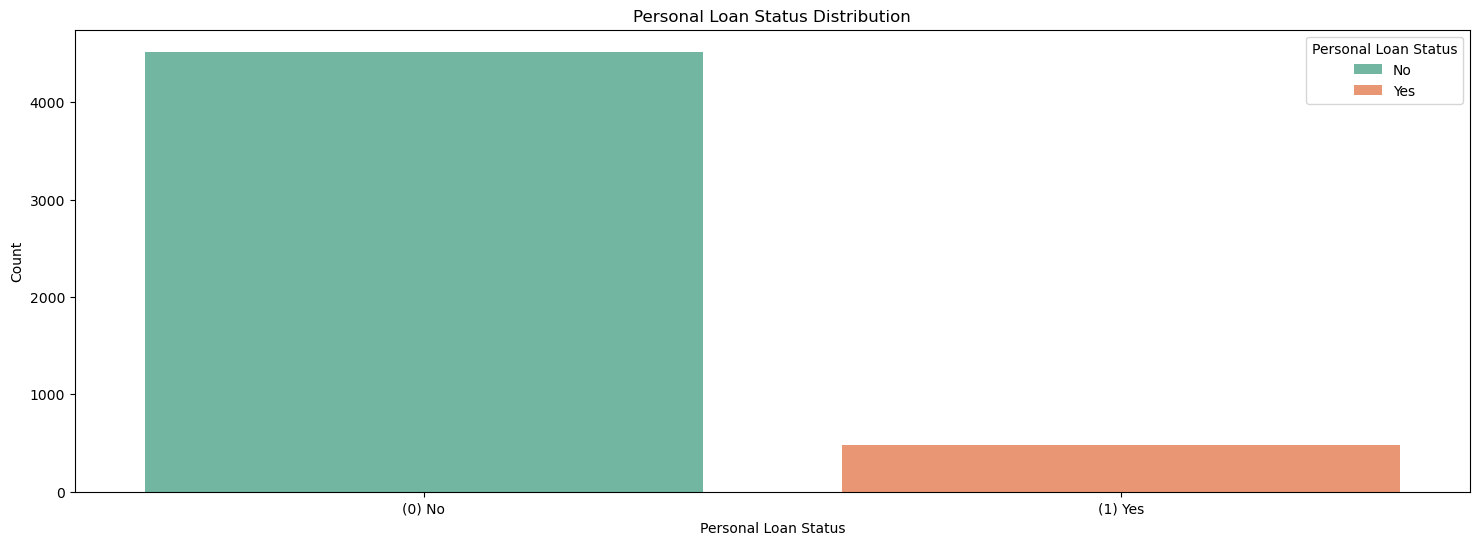

In [74]:
# Plot a count plot of the 'Personal Loan' column to visualize the distribution of personal loan status
plt.figure(figsize=(18, 6))
sns.countplot(x='Personal_Loan', data=data, hue='Personal_Loan', palette='Set2')

# Add legend and labels for Personal Loan status
plt.legend(title='Personal Loan Status', loc='upper right', labels=['No', 'Yes'])

plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.title('Personal Loan Status Distribution')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()


* Over 4000 customers have not signed up for the personal loan product. This is expected because this is the metric that we are trying to improve. This may lend itself to a model where the most important thing to predict is a customer who will sign up for a personal loan status.
* ~500 customers have signed up for the personal loan products.

### Securities Account Analysis

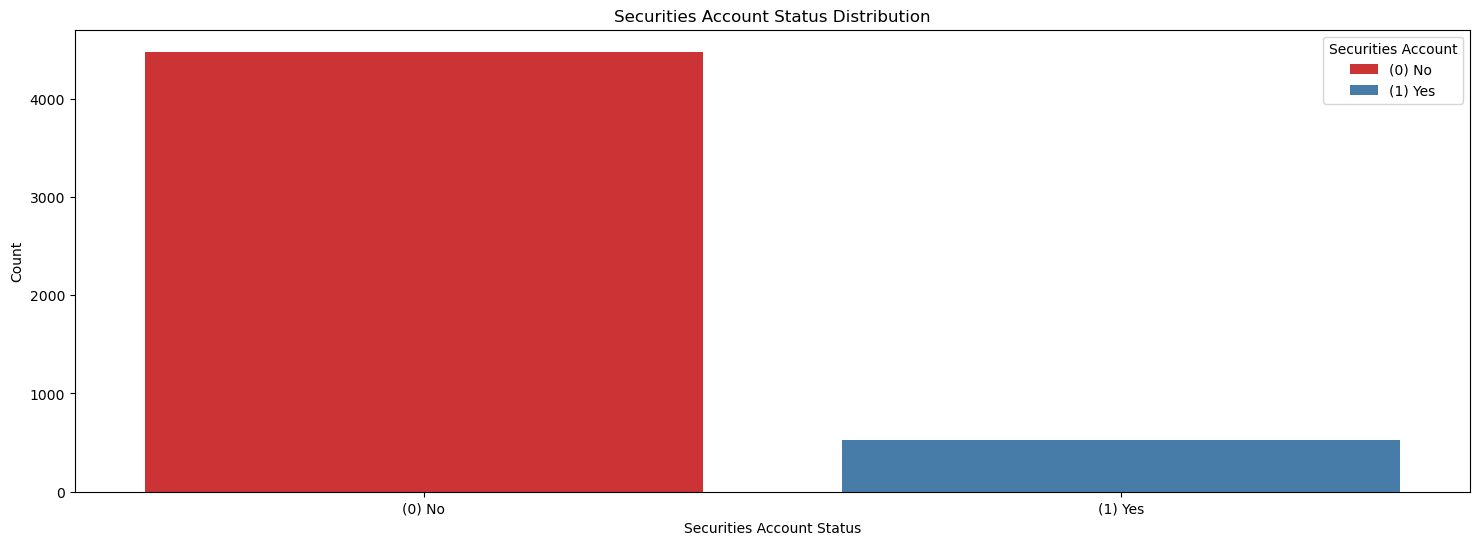

In [75]:
# Plot a count plot of the 'Securities Account' column to visualize the distribution of securities account status
plt.figure(figsize=(18, 6))

sns.countplot(x='Securities_Account', data=data, hue='Securities_Account', palette='Set1')
plt.xlabel('Securities Account Status')
plt.ylabel('Count')

# Add legend and labels for Securities Account status
plt.legend(title='Securities Account', loc='upper right', labels=['(0) No', '(1) Yes'])

plt.title('Securities Account Status Distribution')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()


* Over 4000 customers do not not have a securities account. This almost lines up with the number of customer that haven't signed up for a personal loan product.
* ~500 customers do have a securities account.

### CD Account Analysis


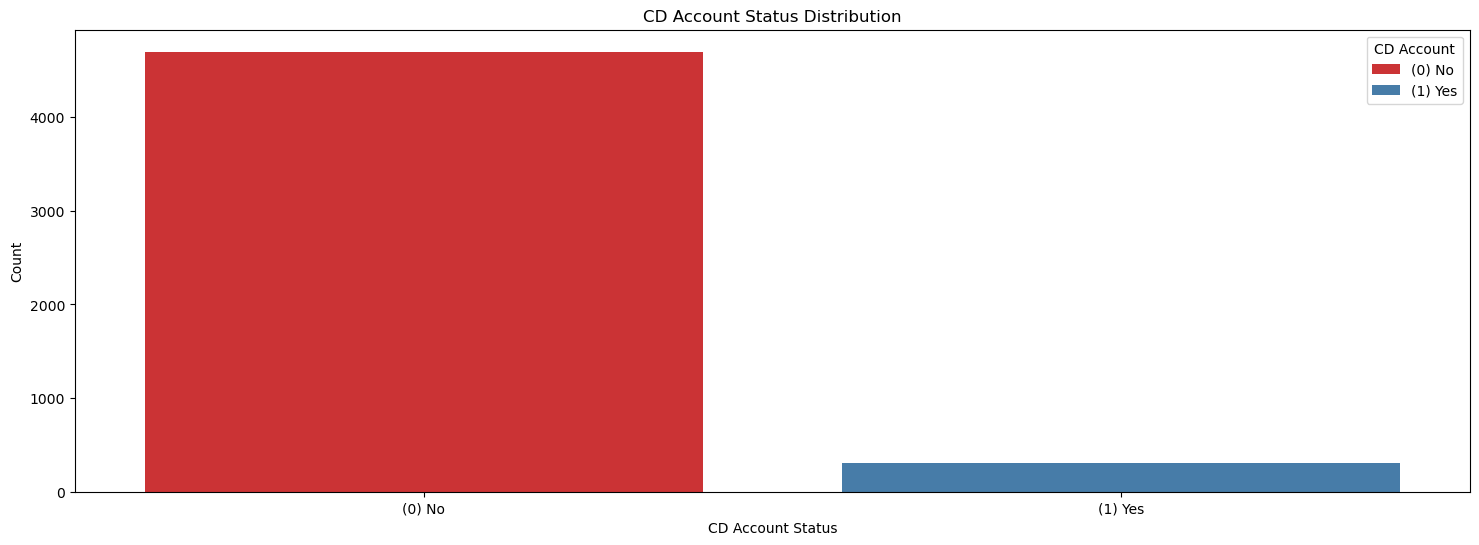

In [76]:
# Plot a count plot of the CD Account column to visualize the distribution of CD account status
plt.figure(figsize=(18, 6))
sns.countplot(x='CD_Account', data=data, hue='CD_Account', palette='Set1')
plt.xlabel('CD Account Status')
plt.ylabel('Count')
# Add legend and labels for CD Account status
plt.legend(title='CD Account', loc='upper right', labels=['(0) No', '(1) Yes'])
plt.title('CD Account Status Distribution')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()

* Over 4000 customers have not opened a CD account
* ~200 customers have opened a CD Account

### Online Analysis

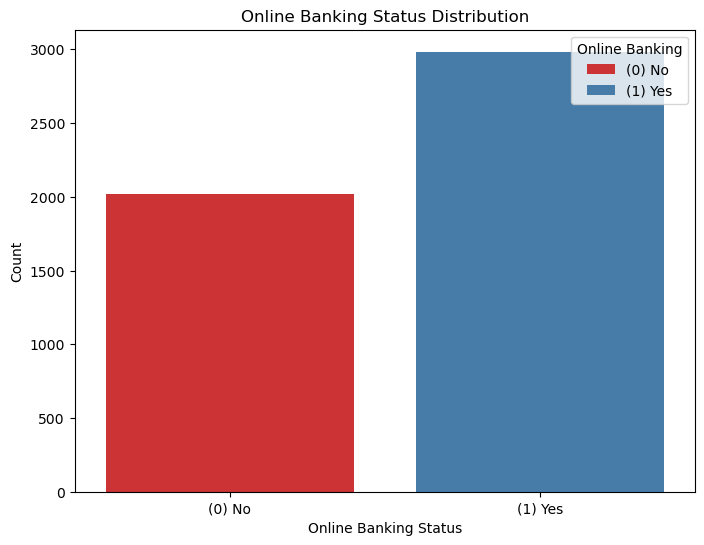

In [77]:
# Plot a count plot of the 'Online' column to visualize the distribution of online banking status
plt.figure(figsize=(8, 6))
sns.countplot(x='Online', data=data, hue='Online', palette='Set1')
plt.xlabel('Online Banking Status')
plt.ylabel('Count')
# Add legend and labels for Online banking status
plt.legend(title='Online Banking', loc='upper right', labels=['(0) No', '(1) Yes'])
plt.title('Online Banking Status Distribution')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()

* ~3000 customers use online banking
* ~2000 customers go into the banking branch for in-person visit


### Credit Analysis

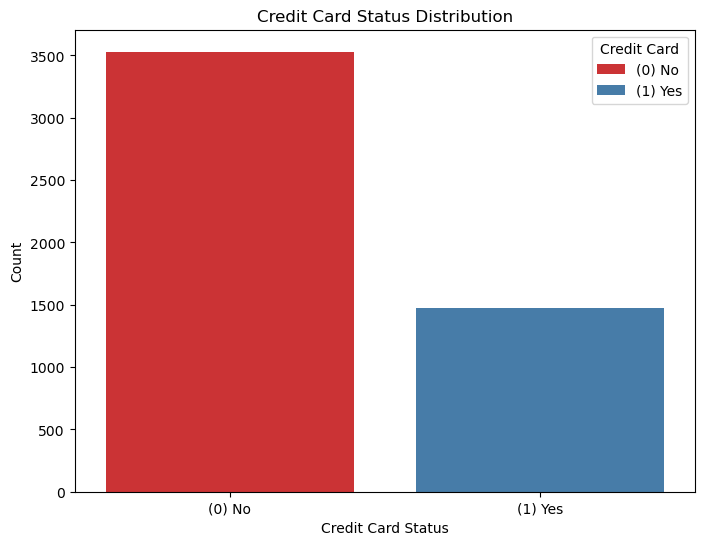

In [78]:
# Plot a count plot of the 'CreditCard' column to visualize the distribution of credit card status
plt.figure(figsize=(8, 6))
sns.countplot(x='CreditCard', data=data, hue='CreditCard', palette='Set1')
plt.xlabel('Credit Card Status')
plt.ylabel('Count')
# Add legend and labels for Credit Card status
plt.legend(title='Credit Card', loc='upper right', labels=['(0) No', '(1) Yes'])
plt.title('Credit Card Status Distribution')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()


* Most of the customers ~3500 use a credit card only issued by this bank.
* ~1500 of the customers use a credit card issues by a different bank.
* This means that only ~30% of customers have a credit card issued by another bank, where 70% of the customers use the credit card issued by this bank.

### County Analysis

/var/folders/42/99lc93xx3999z0t84fkxnnqh0000gn/T/ipykernel_97724/1460364893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='County', data=data, order=data['County'].value_counts().index, palette='viridis')


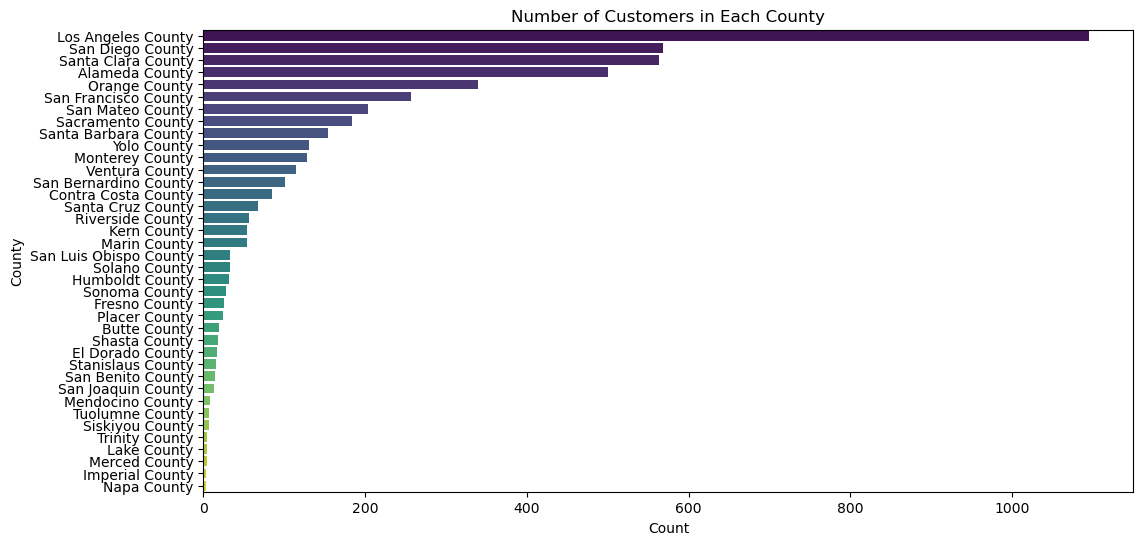

/var/folders/42/99lc93xx3999z0t84fkxnnqh0000gn/T/ipykernel_97724/1460364893.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  countplot_graph = sns.countplot(y='County', data=data[data['County'].isin(top_counties.index)], order=top_counties.index, palette='viridis')
/var/folders/42/99lc93xx3999z0t84fkxnnqh0000gn/T/ipykernel_97724/1460364893.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  countplot_graph.text(value + 0.5, index, f'{value} ({top_counties_percentage[index]:.2f}%)', va='center')


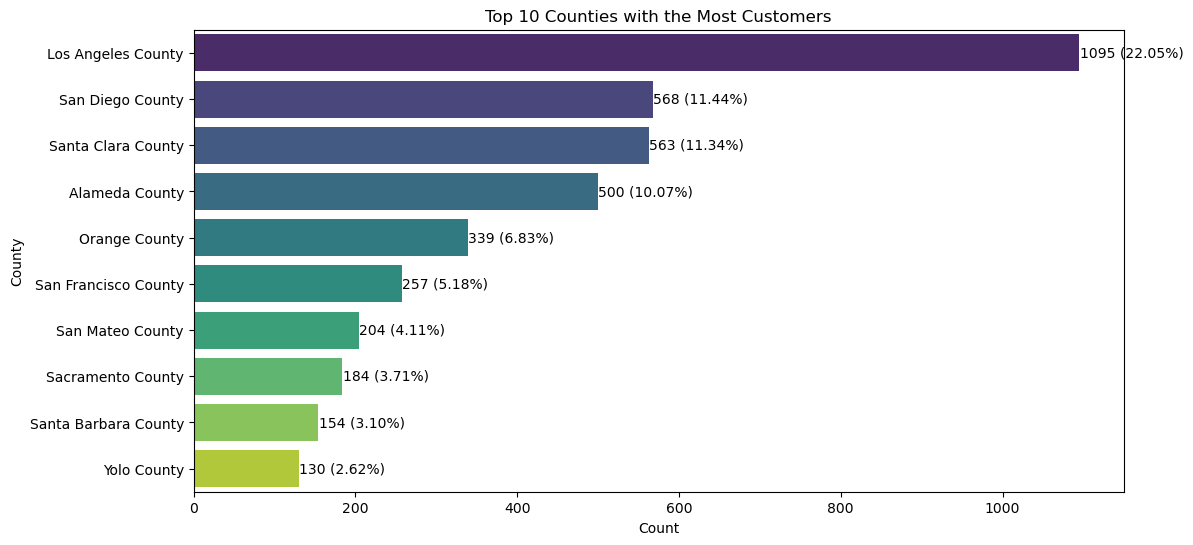

In [79]:
# Plot a bar plot of the number of customers in each county
plt.figure(figsize=(12, 6))
sns.countplot(y='County', data=data, order=data['County'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('County')
plt.title('Number of Customers in Each County')
plt.show()

top_counties = data['County'].value_counts().head(10)
top_counties_percentage = (top_counties / data['County'].value_counts().sum()) * 100

# Plot a count plot of the top 10 counties with the most customers
plt.figure(figsize=(12, 6))
countplot_graph = sns.countplot(y='County', data=data[data['County'].isin(top_counties.index)], order=top_counties.index, palette='viridis')
# Add the percentage of total customers to the count plot
for index, value in enumerate(top_counties):
    countplot_graph.text(value + 0.5, index, f'{value} ({top_counties_percentage[index]:.2f}%)', va='center')

plt.xlabel('Count')
plt.ylabel('County')
plt.title('Top 10 Counties with the Most Customers')
plt.show()



* The majority of the customers are located in LA County and make up 22.05% of the total customer base at 1095.
* The next 3 largest counties are San Diego County, Santa Clara County, and Alameda County at 11.44% (568), 11.34% (563), and 10.07% (500).
* The top 10 counties combined make up roughly 4000 customers which comprise approximately 80% of the customer base.

## Bi-variate Analysis

### Correlation Matrix

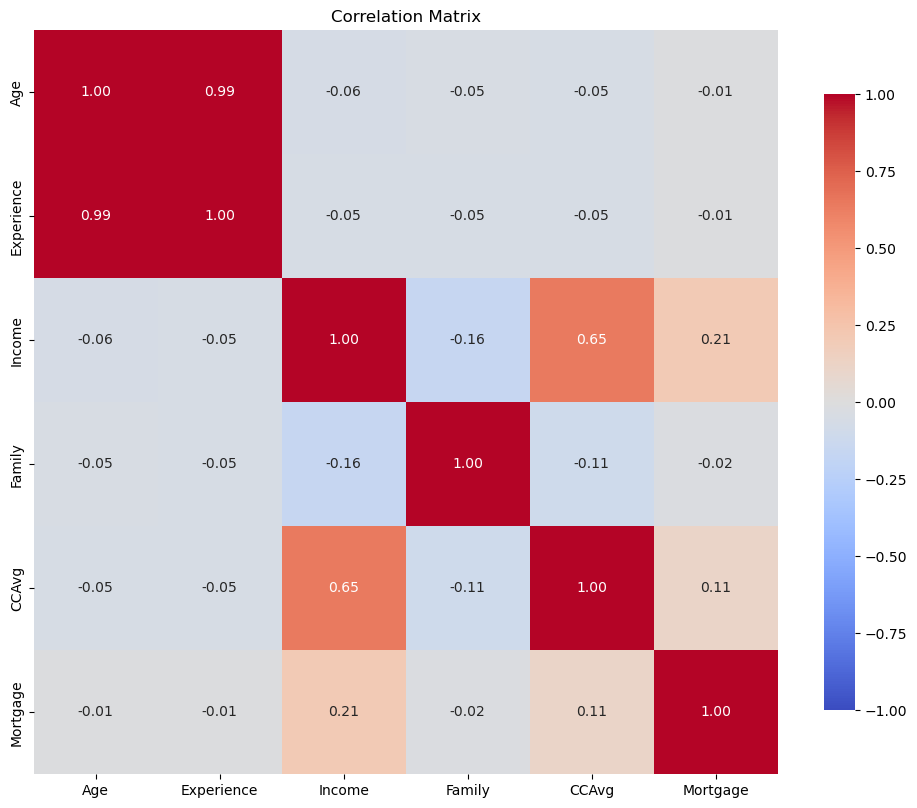

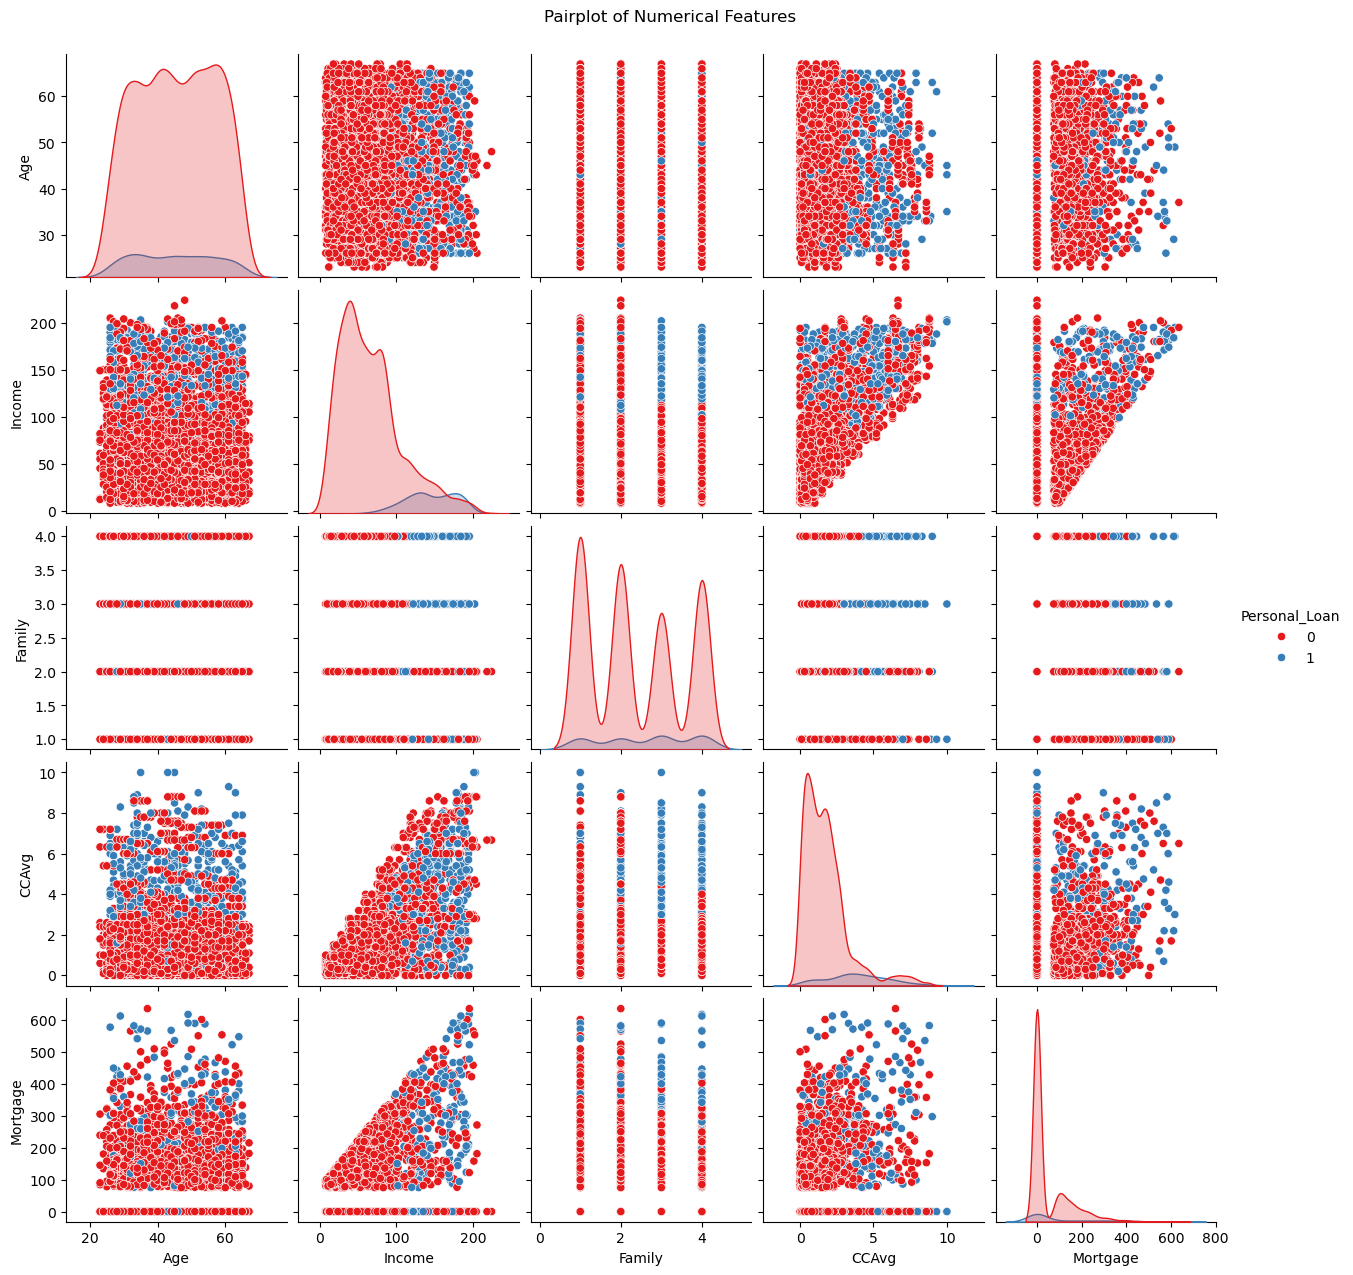

In [80]:
# Perform a correlation analysis to see how the features are related to each other. We'll want to drop the 'ZIPCode' column as well as all the other categorical values
# as does not contribute to the correlation analysis.
dropped_columns = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan', 'County']
correlation_matrix = data.drop(columns=dropped_columns, axis=1).corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Plot a pairplot to visualize the relationships between the numerical features
sns.pairplot(data, hue='Personal_Loan', vars=['Age', 'Income', 'Family', 'CCAvg', 'Mortgage'], palette='Set1')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

* There is a high positive correlation between Age and Experience. This could be misleading since typically the longer you have worked the older you are. So nothing necessarily surprising there. So this behaves nearly the same as Age. So we can drop the Experience for the data analysis because it adds nothing to the model.
* There is a high positive correlation between Income and CCAvg.

### Income vs Personal Loan Status


/var/folders/42/99lc93xx3999z0t84fkxnnqh0000gn/T/ipykernel_97724/284661685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal_Loan', y='Income', data=data, palette='Set2')


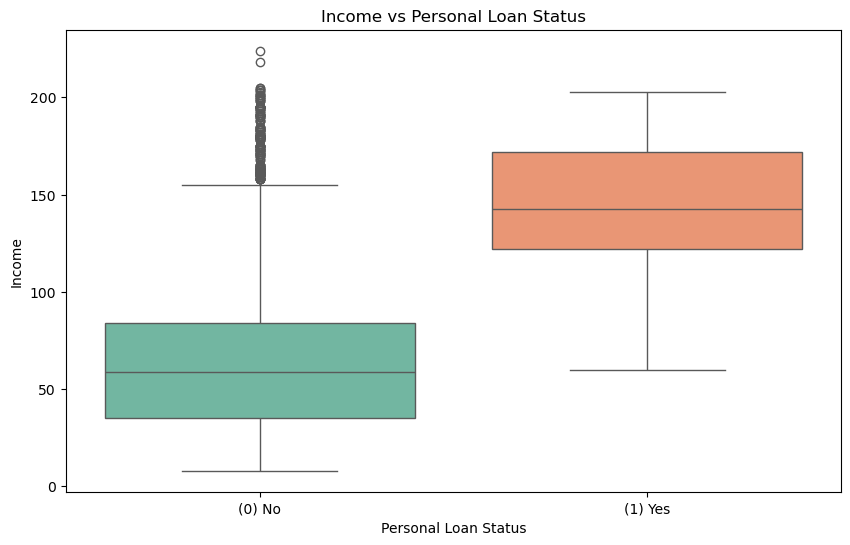

In [81]:
# Do a box plot of "Income" vs "Personal_Loan" to see if there is a relationship between income and personal loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=data, palette='Set2')
plt.xlabel('Personal Loan Status')
plt.ylabel('Income')
plt.title('Income vs Personal Loan Status')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()


* In general customers who have an income between ~125K to ~165K are more likely to also have a personal loan. There are no outliers in the "Yes" category.
* In general customers who below ~100K are less likely to have a personal loan product. There are outliers where customer above 150K in the "No" category do not have a personal loan.



### Credit Card Average Monthly Spend vs Personal Loan Status



/var/folders/42/99lc93xx3999z0t84fkxnnqh0000gn/T/ipykernel_97724/2249872048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal_Loan', y='CCAvg', data=data, palette='Set2')


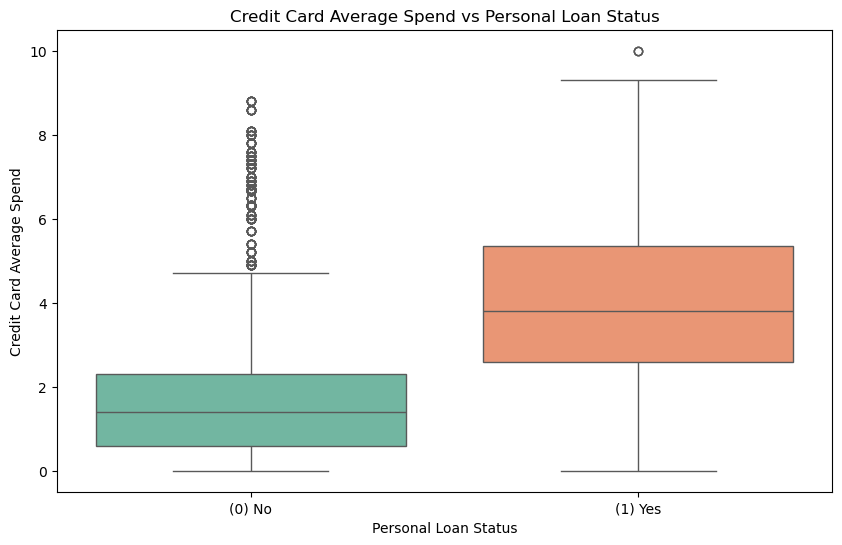

In [82]:
# Do a box plot of "CC Avg" vs "Personal_Loan" to see if there is a relationship between monthly credit card send and personal loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='CCAvg', data=data, palette='Set2')
plt.xlabel('Personal Loan Status')
plt.ylabel('Credit Card Average Spend')
plt.title('Credit Card Average Spend vs Personal Loan Status')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()


* Customers who have a monthly credit card spend of less than ~$2K do not have a personal loan. There are outliers where customers with monthly credit card spend above $5K also do not have a personal loan.
* Customers who have monthly credit card spend between ~$3K and $5K also have personal loan. One outlier is here where a single customer at $10K monthly spend also has a personal loan.


### County vs Personal Loan Status

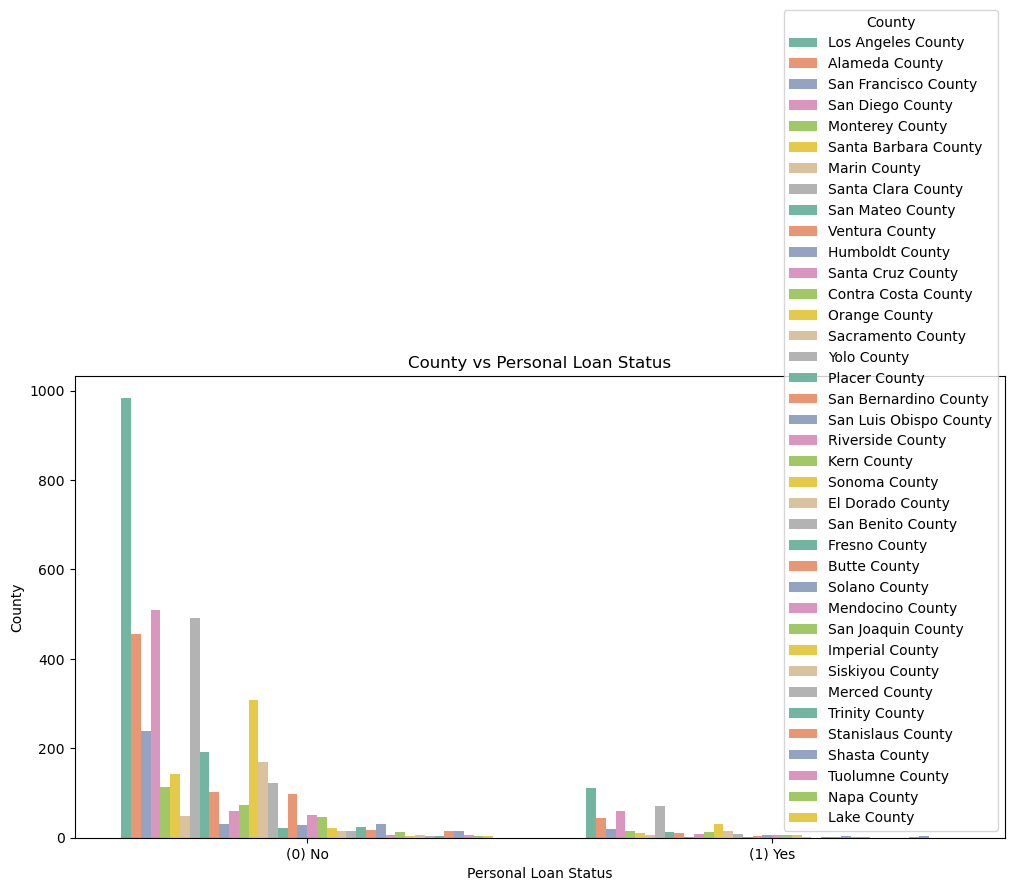

In [83]:
# Do a box plot of "County" vs "Personal_Loan" to see if there is a relationship between the county a customer is in and their personal loan status
plt.figure(figsize=(12, 6))
sns.countplot(x='Personal_Loan', hue='County', data=data, palette='Set2')
plt.xlabel('Personal Loan Status')
plt.ylabel('County')
plt.title('County vs Personal Loan Status')
plt.xticks(ticks=[0, 1], labels=['(0) No', '(1) Yes'])
plt.show()

* County doesn't really play a role in determining if a customer is more likely to have a personal loan product even though we found a more manageable way to segment the zip codes data into more manageable chunks. We will see later if the decision tree decides to use this value or not.

### Family Vs Personal Loan

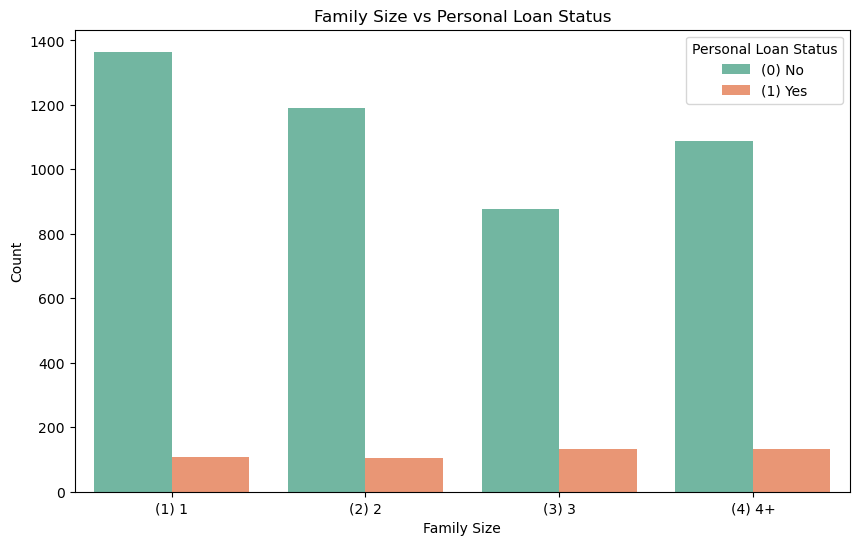

In [84]:
# Do a count plot of "Family" vs "Personal_Loan" to see if there is a relationship between the family size of a customer and their personal loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='Family', hue='Personal_Loan', data=data, palette='Set2')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Family Size vs Personal Loan Status')
plt.xticks(ticks=[0, 1, 2, 3], labels=['(1) 1', '(2) 2', '(3) 3', '(4) 4+'])
plt.legend(title='Personal Loan Status', loc='upper right', labels=['(0) No', '(1) Yes'])
plt.show()


* Since the majority of the customer's don't have a personal loan family size doesn't really effect as much if they will take one or not.
* Regardless of the family size roughly 100 in each family size category will take out a personal load product.

### Education vs Personal Loan


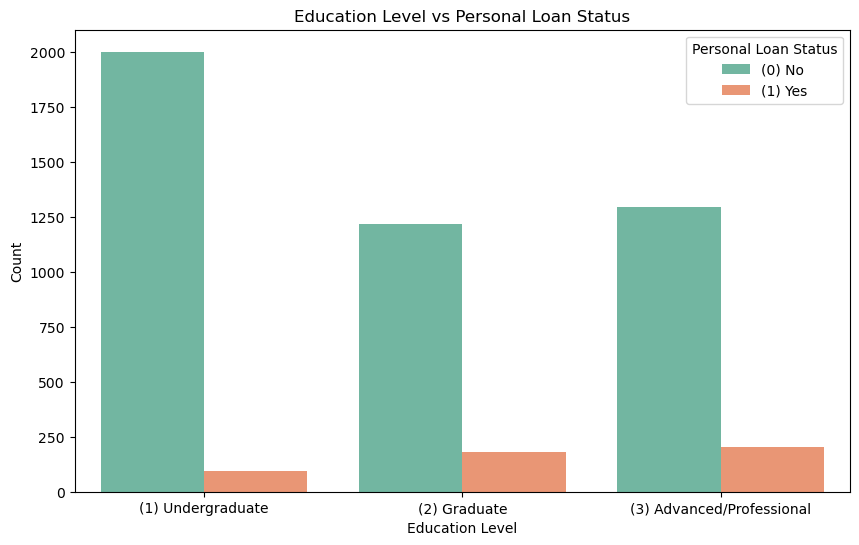

In [85]:
# Do a count plot of "Education" vs "Personal_Loan" to see if there is a relationship between the Education Level of a customer and their personal loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data, palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Personal Loan Status')
plt.xticks(ticks=[0, 1, 2], labels=['(1) Undergraduate', '(2) Graduate', '(3) Advanced/Professional'])
plt.legend(title='Personal Loan Status', loc='upper right', labels=['(0) No', '(1) Yes'])
plt.show()

* In general there is only a marginally small uptick from 50 to 100 or so in terms of which customers will take a personal loan for Graduate and Advanced Professional Levels.
* Regardless of educational level, however, most customers do not have a personal loan product.

### Age vs Personal Loan Status

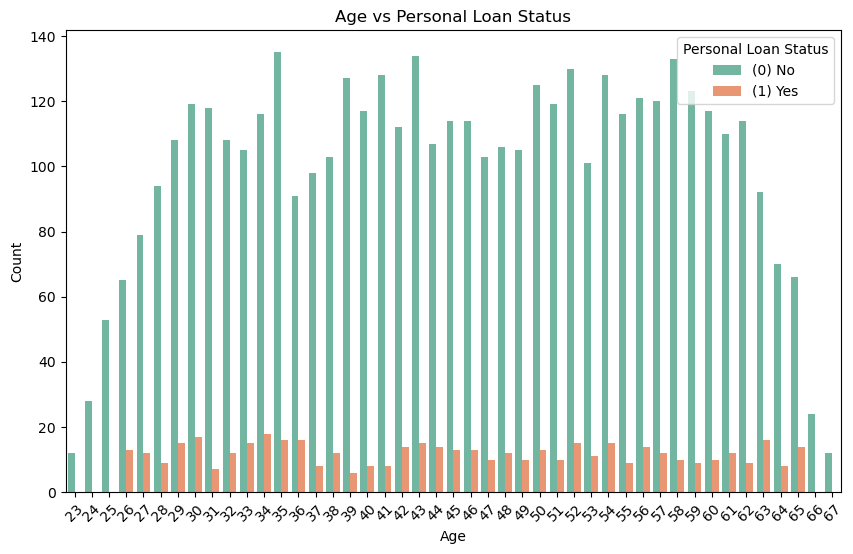

In [86]:
# Do a count plot for "Age" vs "Personal_Loan" to see if there is a relationship between the age of a customer and their personal loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Personal_Loan', data=data, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs Personal Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Personal Loan Status', loc='upper right', labels=['(0) No', '(1) Yes'])
plt.show()




* Age doesn't affect whether a person will get a personal loan or not.

### Income Vs CC Avg Monthly Spend

/var/folders/42/99lc93xx3999z0t84fkxnnqh0000gn/T/ipykernel_97724/3948454189.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Income', y='CCAvg', data=data, palette='Set1')


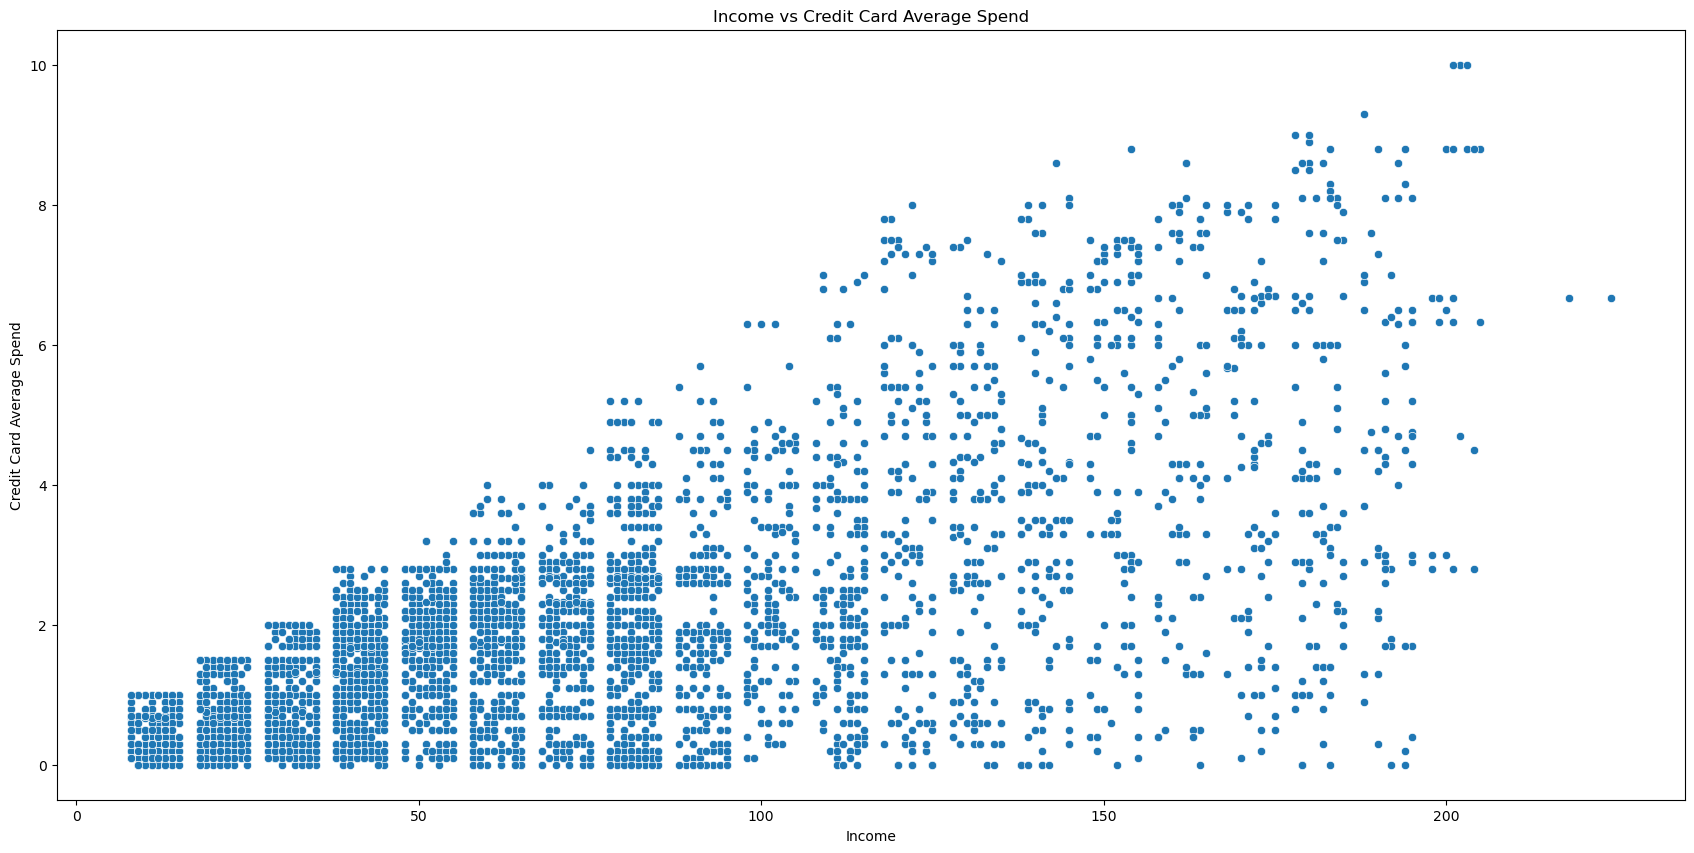

In [87]:
# Do a scatter plot to visualize the relationship between 'Income' and 'CCAvg'
plt.figure(figsize=(21, 10))
sns.scatterplot(x='Income', y='CCAvg', data=data, palette='Set1')
plt.xlabel('Income')
plt.ylabel('Credit Card Average Spend')
plt.title('Income vs Credit Card Average Spend')
plt.show()

* In general as the income goes so does the range of monthly average credit card expenditures
* The highest salaries of 200K+ see average credit card spends between approximately $6K to $10K
* The lower salary ranges of 50K less see the average credit card spends between 0 - $2K



### Income and CCAvg Monthly Spend By County Analysis


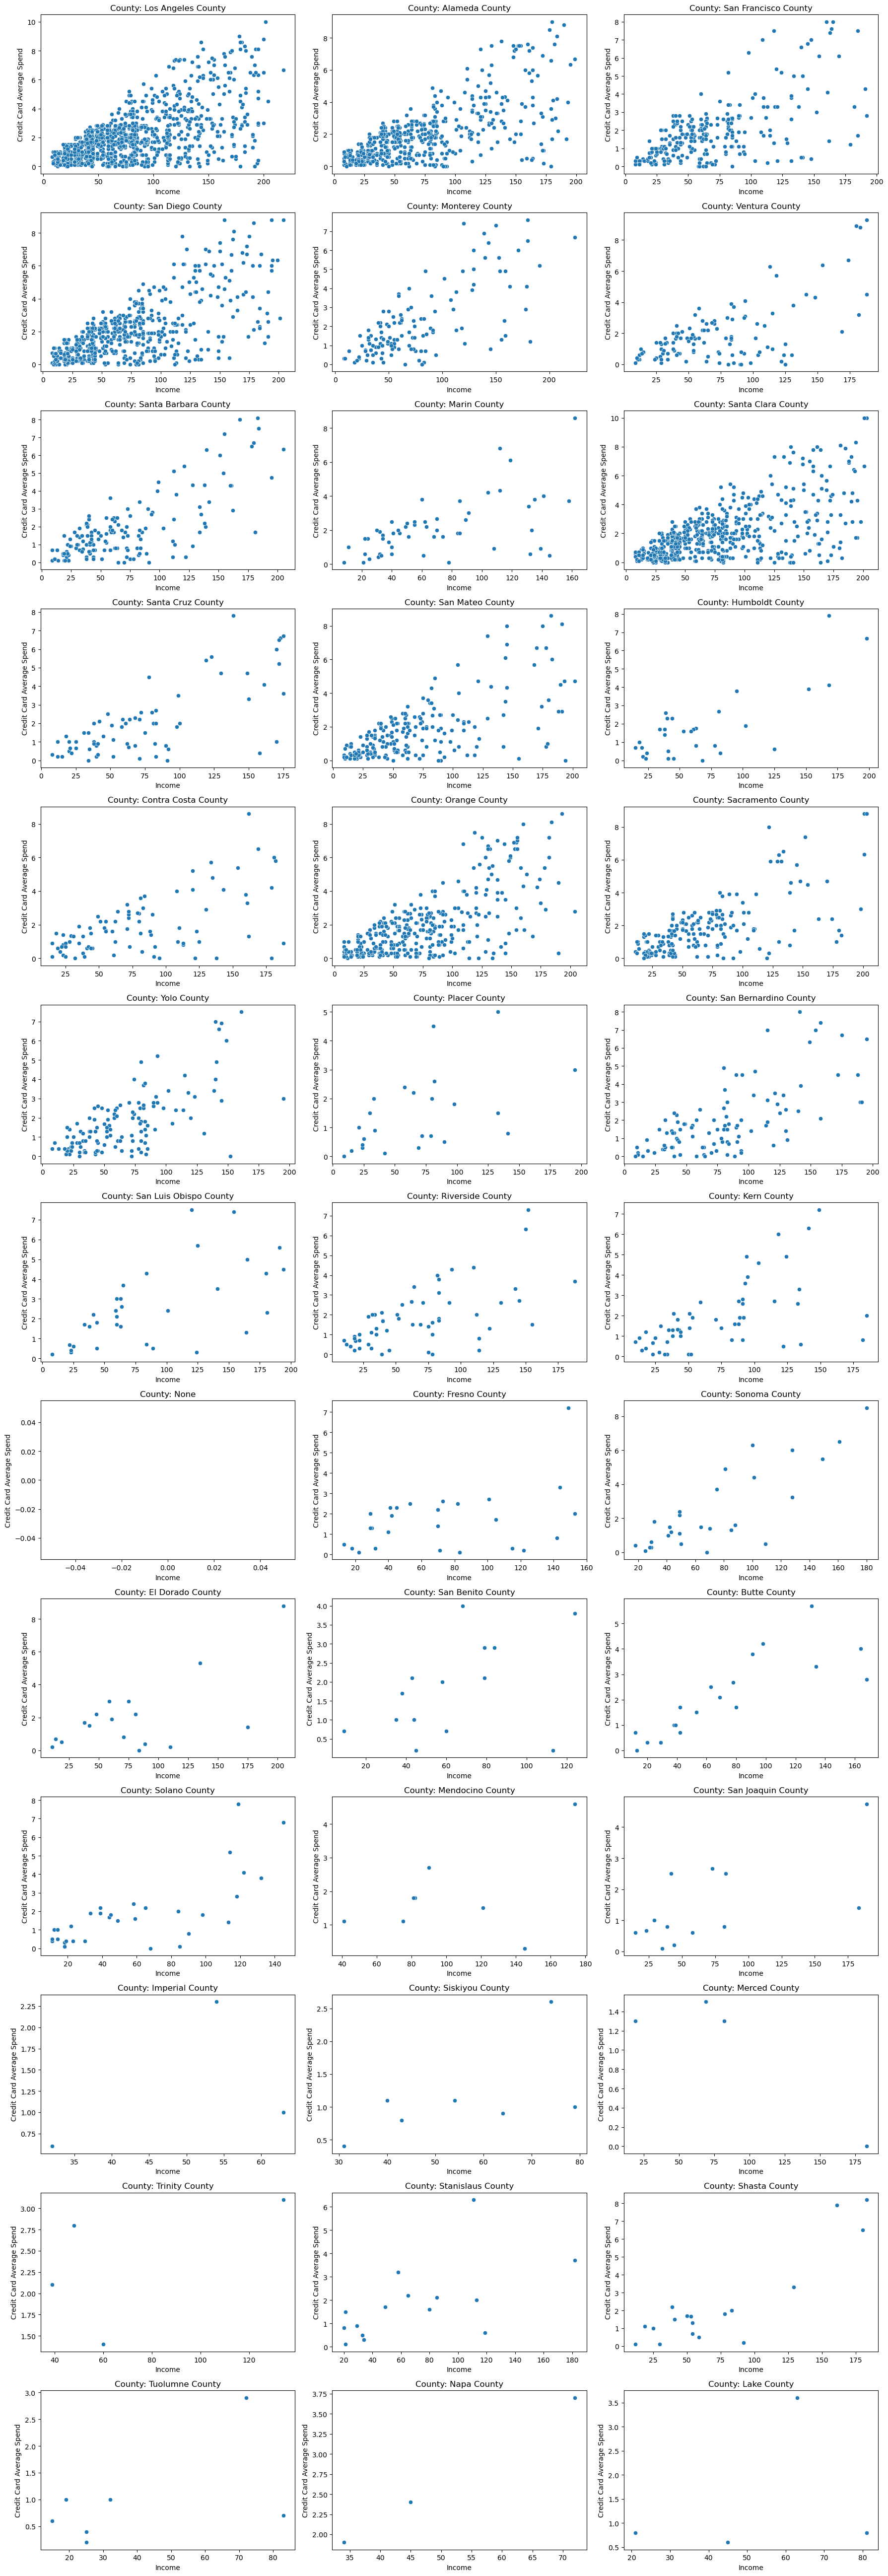

In [88]:
# Plot a box plot of the 'Income' column against 'CCAvg' with Hue = 'County' to visualize the relationship between income and credit card average spend
unique_counties = data['County'].unique()
num_counties = len(unique_counties)
cols = 3
rows = (num_counties // cols) + int(num_counties % cols != 0)

plt.figure(figsize=(cols * 6, rows * 4))

for i, county in enumerate(unique_counties):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=data[data['County'] == county], x='Income', y='CCAvg')
    plt.title(f'County: {county}')
    plt.xlabel('Income')
    plt.ylabel('Credit Card Average Spend')

plt.tight_layout()
plt.show()

* As expected the greatest concentration of customers who have average spends on their credit card is in La County
* The next 3 largest counties are San Diego County, Santa Clara County, and Alameda County have the next largest concentration of customers who have average monthly spends on their credit cards.
* The first 2 observations are consistent with what we found earlier by looking at the concentration of customers by county earlier.

### Exploratory Data Analysis Summary:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?



* The mortgage distribution is highly skewed, with most customers not having a mortgage.
* The Number of customers who do not have a Credit Card is 106 which is 2.12% of the customers.
* The Number of customers who have a Credit Card is 4860 which is 97.20% of the customers
* The attributes that have the strongest correlation on the target attribute are Income and average monthly credit card spend (CC AVG). Higher Income individuals tend to also have higher monthly credit card spends.
* Education level doesn't really have an impact on whether a customer will get a personal loan product
* Age doesn't have a factor on personal loan status.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [89]:
#Drop the Experience column as it is not a useful feature for the model and does not contribute to the prediction of personal loans. We can just use Age.
data.drop(columns=['Experience'], inplace=True)

# The last thing that we need to do is to one hot code all of the categorical variables in the dataset. This will allow us to convert the categorical variables into numerical variables that can be 
# used in machine learning models. Per our conversation in the project discussion on 5-31-25 we especially want to one-hot encode the 'Education' category variable to avoid the ordinal encoding issue,
# as it does not have a natural order and would introduce bias ny suggesting that one education level is better than another.

# Convert categorical variables that have more values than just 0 and 1 to numerical using one-hot encoding

# Clean County column before encoding
data['County'] = data['County'].fillna('Unknown').astype(str).str.strip()

#Convert Education values to strings to avoid issues with one-hot encoding
data['Education'] = data['Education'].astype(str)

# One-hot encode categorical variables and make sure True = 1 and False = 0
data_encoded = pd.get_dummies(data, columns=['Education', 'County'], drop_first=True, dtype=float)

# Split the encoded data into features and target variable
X = data_encoded.drop(columns=['Personal_Loan'], axis=1)
y = data_encoded['Personal_Loan']

# Make sure that the features are numerical
X = X.astype(float)

# Make sure that the target variable is a binary variable
y = y.astype(int)

# Define the random state for reproducibility and the test size for the train-test split
RS = 42

# Define the test size for the train-test split as 30% of the dataset
TS = 0.3

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=RS, stratify=y)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 49)
Shape of test set: (1500, 49)
Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


In [90]:
# Show all columns in the DataFrame
pd.set_option('display.max_columns', None)
display(X.head())
display(y.head())

print("Shape Of X:", X.shape)
print("Shape Of y:", y.shape)


Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  \
0  25.0    49.0     4.0    1.6       0.0                 1.0         0.0   
1  45.0    34.0     3.0    1.5       0.0                 1.0         0.0   
2  39.0    11.0     1.0    1.0       0.0                 0.0         0.0   
3  35.0   100.0     1.0    2.7       0.0                 0.0         0.0   
4  35.0    45.0     4.0    1.0       0.0                 0.0         0.0   

   Online  CreditCard  Education_2  Education_3  County_Butte County  \
0     0.0         0.0          0.0          0.0                  0.0   
1     0.0         0.0          0.0          0.0                  0.0   
2     0.0         0.0          0.0          0.0                  0.0   
3     0.0         0.0          1.0          0.0                  0.0   
4     0.0         1.0          1.0          0.0                  0.0   

   County_Contra Costa County  County_El Dorado County  County_Fresno County  \
0                         0.0                      0.0                   0.0   
1                         0.0                      0.0                   0.0   
2                         0.0                      0.0                   0.0   
3                         0.0                      0.0                   0.0   
4                         0.0                      0.0                   0.0   

   County_Humboldt County  County_Imperial County  County_Kern County  \
0                     0.0                     0.0                 0.0   
1                     0.0                     0.0                 0.0   
2                     0.0                     0.0                 0.0   
3                     0.0                     0.0                 0.0   
4                     0.0                     0.0                 0.0   

   County_Lake County  County_Los Angeles County  County_Marin County  \
0                 0.0                        1.0                  0.0   
1                 0.0                        1.0                  0.0   
2                 0.0                        0.0                  0.0   
3                 0.0                        0.0                  0.0   
4                 0.0                        1.0                  0.0   

   County_Mendocino County  County_Merced County  County_Monterey County  \
0                      0.0                   0.0                     0.0   
1                      0.0                   0.0                     0.0   
2                      0.0                   0.0                     0.0   
3                      0.0                   0.0                     0.0   
4                      0.0                   0.0                     0.0   

   County_Napa County  County_Orange County  County_Placer County  \
0                 0.0                   0.0                   0.0   
1                 0.0                   0.0                   0.0   
2                 0.0                   0.0                   0.0   
3                 0.0                   0.0                   0.0   
4                 0.0                   0.0                   0.0   

   County_Riverside County  County_Sacramento County  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   County_San Benito County  County_San Bernardino County  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   County_San Diego County  County_San Francisco County  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2 

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

Shape Of X: (5000, 49)
Shape Of y: (5000,)


## Model Building

### Define all the functions that will handle calculating all of the performance metrics for decision tree modeling

In [91]:
#Define performance metrics modeling here.
def performance_metrics(dtree, x, y, dtree_name="Default"):
    y_pred = dtree.predict(x)

    # Get the maximum depth, number of leaf nodes, and minimum samples split from the decision tree
    max_depth = dtree.tree_.max_depth
    max_leaf_nodes = dtree.get_n_leaves()
    max_samples_split = dtree.min_samples_split

    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision  = precision_score(y, y_pred)

    # Return a data frame with the performance metrics
    metrics_df = pd.DataFrame({
        'Model': [dtree_name],
        'Node Count': [dtree.tree_.node_count],
        'Max Depth': [max_depth],
        'Max Leaf Nodes': [max_leaf_nodes],
        'Min Samples Split': [max_samples_split],
        'F1 Score': [f1],
        'Accuracy Score': [accuracy],
        'Recall Score': [recall],
        'Precision Score': [precision]
    })
    
    return metrics_df

### Define all the functions that will be used to display the Confusion Matrix, Decision Tree, and 

In [92]:
def display_confusion_matrix(dtree, x, y, title=None):
    y_pred = dtree.predict(x)

    cm = confusion_matrix(y, y_pred, labels=[0, 1])

    # Normalize by row (example)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            f"{item}\n{item / cm.sum():.2%}"
            for item in cm.flatten()
        ]
    ).reshape(cm.shape)

    # Create the confusion matrix display and turn off the grid
    # and set the display labels to 'No' and 'Yes'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(include_values=False)  # Prevent default annotation

    ax = disp.ax_

    # Set the title of the confusion matrix plot if provided
    if title is not None:
        ax.set_title(title)

    for (i, j), label in np.ndenumerate(labels):
        ax.text(j, i, label, ha='center', va='center', color='black', fontsize=12)
    plt.grid(False)  # Turn off the grid

# def draw_decision_tree(dtree, x, y):

#     feature_names = list(x.columns)
#     class_names = ['No', 'Yes'] if len(set(y)) == 2 else [str(c) for c in sorted(set(y))]

#     dot_data = export_graphviz(
#         dtree,
#         out_file=None,
#         feature_names=feature_names,
#         class_names=class_names,
#         filled=True,
#         rounded=True,
#         special_characters=True
#     )

#     graph = pydotplus.graph_from_dot_data(dot_data)
#     display(Image(graph.create_png()))



def draw_decision_tree(dtree, x, y):
    feature_names = list(x.columns)

    # set the figure size for the plot
    plt.figure(figsize=(20, 20))

    # plotting the decision tree
    out = tree.plot_tree(
        dtree,                         # decision tree classifier model
        feature_names=feature_names,    # list of feature names (columns) in the dataset
        filled=True,                    # fill the nodes with colors based on class
        fontsize=9,                     # font size for the node text
        node_ids=False,                 # do not show the ID of each node
        class_names=None,               # whether or not to display class names
    )

    # add arrows to the decision tree splits if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")    # set arrow color to black
            arrow.set_linewidth(1)          # set arrow linewidth to 1

    # displaying the plot
    plt.show()

### Define all the methods that will be used to build a pre and post pruned tree.

In [93]:
def generate_pre_pruned_tree(X_train, X_test, y_train, y_test):
    #Define the different ranges of max_depth, min_samples_split, and max_leaf_nodes to test
    max_depth_range = np.arange(2, 20, 1)
    min_samples_split_range = np.arange(5, 201, 20)
    max_leaf_nodes_range = np.arange(5, 201, 20)

    best_decision_tree = None
    # best_recall_score = float('inf')
    best_recall_score = 1.0

    # Create a list to store the results of the different combinations of hyperparameters
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            for max_leaf_nodes in max_leaf_nodes_range:
                # Create a decision tree classifier with the current hyperparameters
                dtree = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    max_leaf_nodes=max_leaf_nodes,
                    random_state=RS,
                    class_weight='balanced'  # Use balanced class weights to handle class imbalance                
                )

                dtree.fit(X_train, y_train)

                y_train_pred = dtree.predict(X_train)
                y_test_pred = dtree.predict(X_test)

                #Calculate the recall score for both training and test sets. This is important because we want the model to be able to be really good
                #at predicting the positive class (i.e., customers who will take a personal loan)
                recall_train = recall_score(y_train, y_train_pred)
                recall_test = recall_score(y_test, y_test_pred)

                #Calculate the absolute difference between the recall scores of the training and test sets
                recall_diff = abs(recall_train - recall_test)

                # If the absolute difference between the recall scores is less than the best recall score, update the best decision tree and best recall score
                if recall_diff < best_recall_score:
                    best_recall_score = recall_diff
                    best_decision_tree = dtree

    return best_decision_tree
    
def generate_post_pruned_tree(X_train, X_test, y_train, y_test):
    best_decision_tree = None
    best_recall_score = float('inf')

    # Create a decision tree classifier with the default parameters and represents the most complex tree
    default_tree = DecisionTreeClassifier(random_state=RS, class_weight='balanced')

    # Compute the cost complexity pruning path for the model using the training data
    path = default_tree.cost_complexity_pruning_path(X_train, y_train)

    # Extract the array of effective alphas from the pruning path
    ccp_alphas = abs(path.ccp_alphas)

    # Remove the last alpha value, which represents pruning the entire tree
    ccp_alphas = ccp_alphas[:-1]

    #Loop through the ccp_alphas to find the best alpha value that maximizes the F1 score for the decision tree model
    for ccp_alpha in ccp_alphas:
        # Create a decision tree classifier with the current alpha value
        post_pruned_tree = DecisionTreeClassifier(
            ccp_alpha=ccp_alpha,
            random_state=RS,
            class_weight='balanced'
        )

        post_pruned_tree.fit(X_train, y_train)
        y_train_pred = post_pruned_tree.predict(X_train)
        y_test_pred = post_pruned_tree.predict(X_test)

        #Calculate the recall score for both training and test sets. This is important because we want the model to be able to be really good
        #at predicting the positive class (i.e., customers who will take a personal loan)
        recall_train = recall_score(y_train, y_train_pred)
        recall_test = recall_score(y_test, y_test_pred)

        #Calculate the absolute difference between the recall scores of the training and test sets
        recall_diff = abs(recall_train - recall_test)

        # If the absolute difference between the F1 scores is less than the best F1 score, update the best decision tree and best F1 score
        if recall_diff < best_recall_score:
            best_recall_score = recall_diff
            best_decision_tree = post_pruned_tree
            
    return best_decision_tree


### Build the models for the default tree, pre-pruned tree, and post-pruned tree

In [94]:
# Build the default decision tree classifier with the training set
default_tree = DecisionTreeClassifier(random_state=RS)
default_tree.fit(X_train, y_train)

# Build the pre-pruned tree with the training set and test set f1 score evaluations
pre_pruned_tree = generate_pre_pruned_tree(X_train, X_test, y_train, y_test)

# Build the post-pruned tree with the training set and test set f1 score evaluations
post_pruned_tree = generate_post_pruned_tree(X_train, X_test, y_train, y_test)

### Default Decision Tree


Model  Node Count  Max Depth  \
0  Default Decision Tree - Training Set         119         14   

   Max Leaf Nodes  Min Samples Split  F1 Score  Accuracy Score  Recall Score  \
0              60                  2       1.0             1.0           1.0   

   Precision Score  
0              1.0

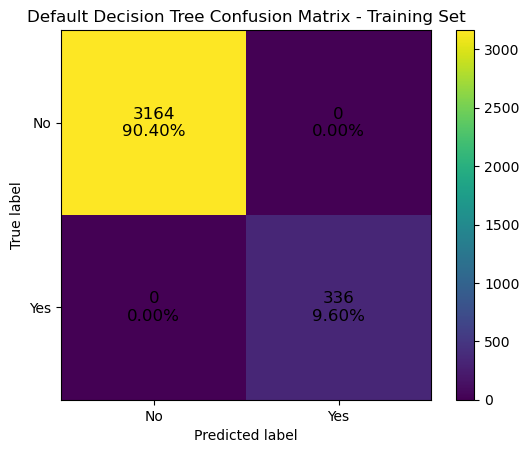

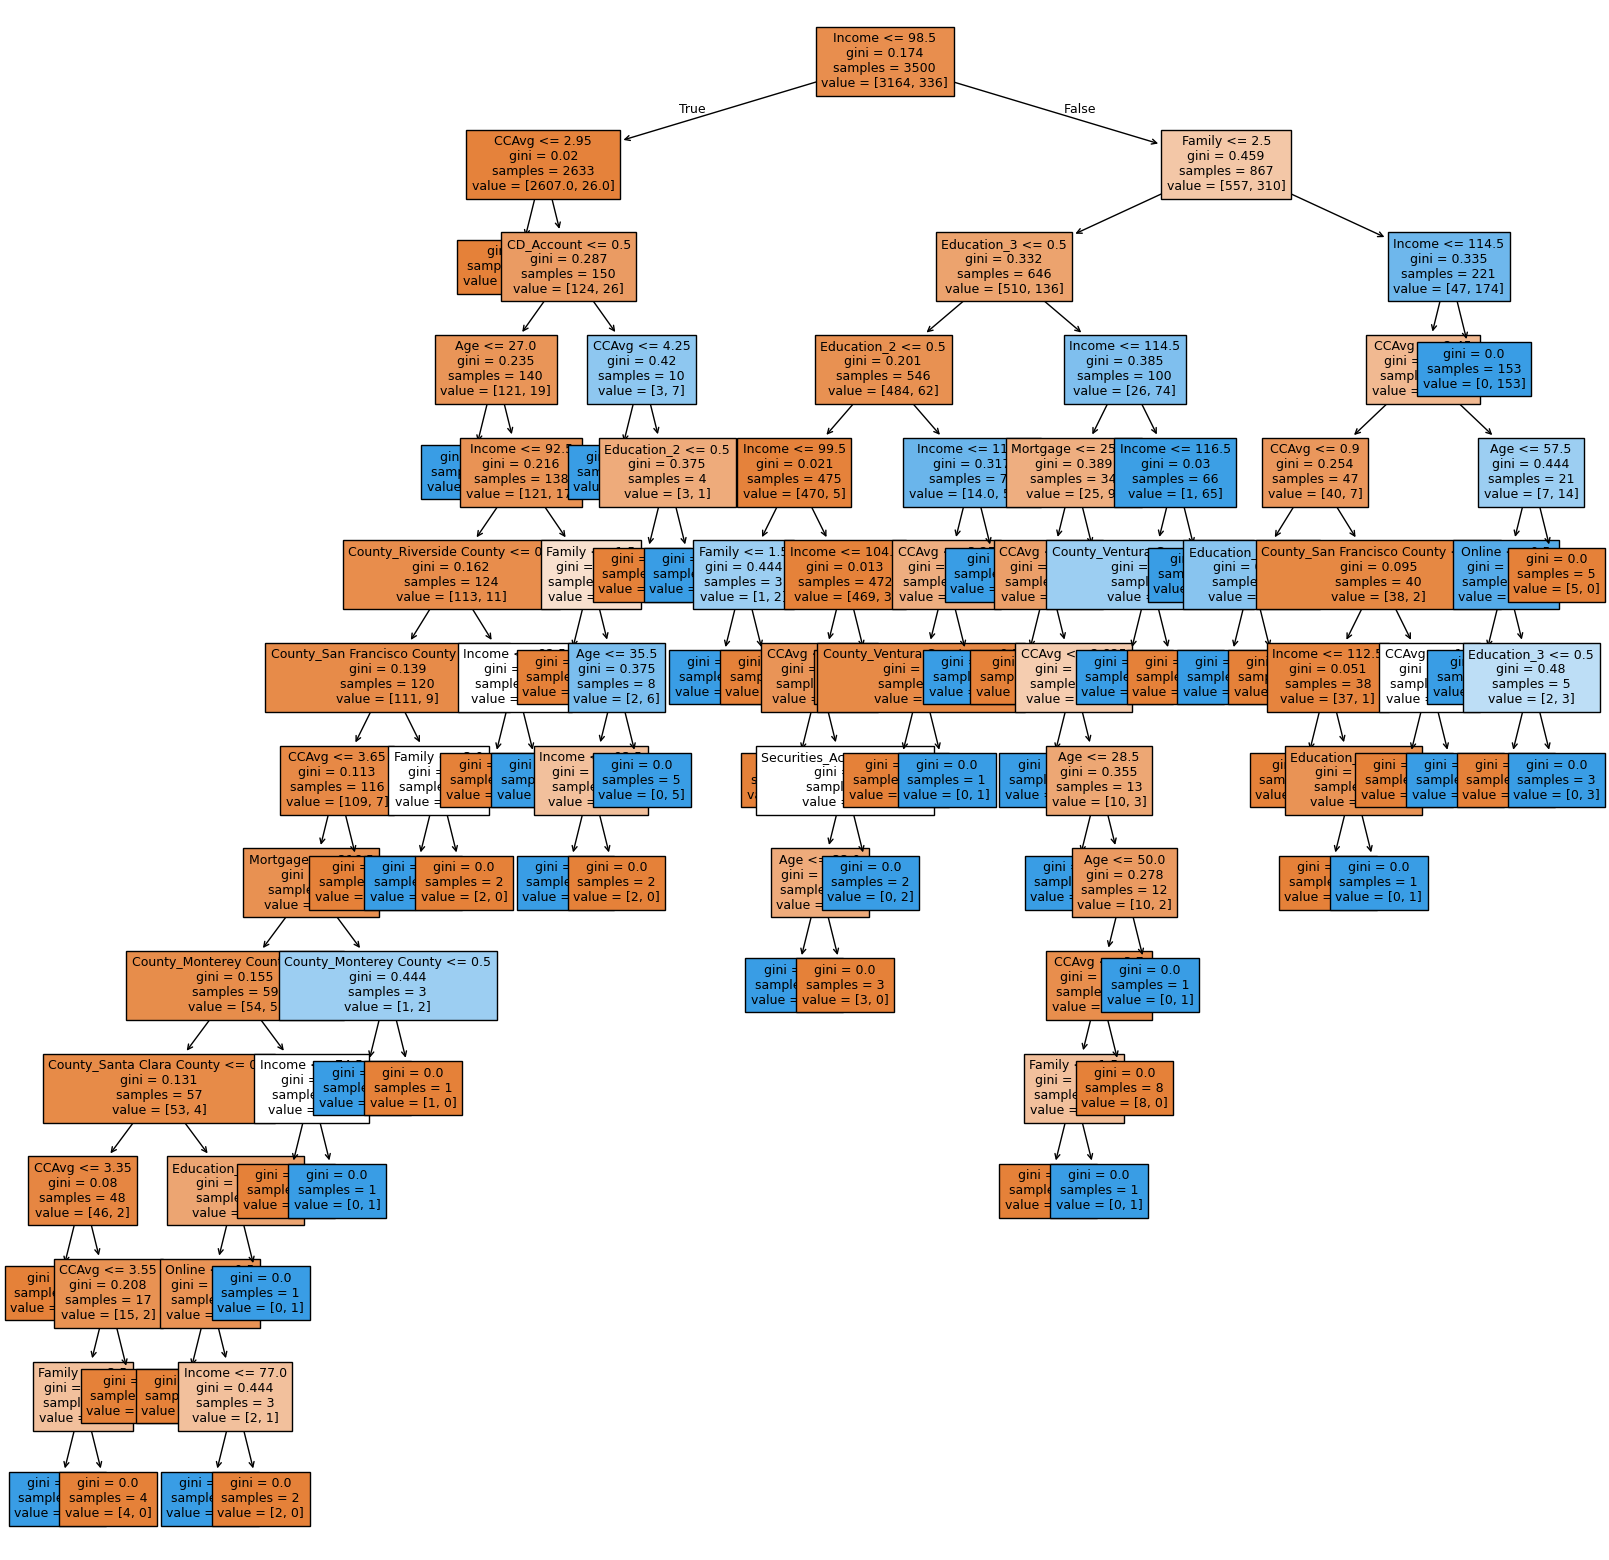

In [95]:
# Display the performance metrics, confusion matrix, and decision tree for the default decision tree classifier for the training set
display(performance_metrics(default_tree, X_train, y_train, dtree_name="Default Decision Tree - Training Set"))
display_confusion_matrix(default_tree, X_train, y_train, title="Default Decision Tree Confusion Matrix - Training Set")
draw_decision_tree(default_tree, X_train, y_train)

Model  Node Count  Max Depth  Max Leaf Nodes  \
0  Default Decision Tree - Test Set         119         14              60   

   Min Samples Split  F1 Score  Accuracy Score  Recall Score  Precision Score  
0                  2  0.910345        0.982667      0.916667          0.90411

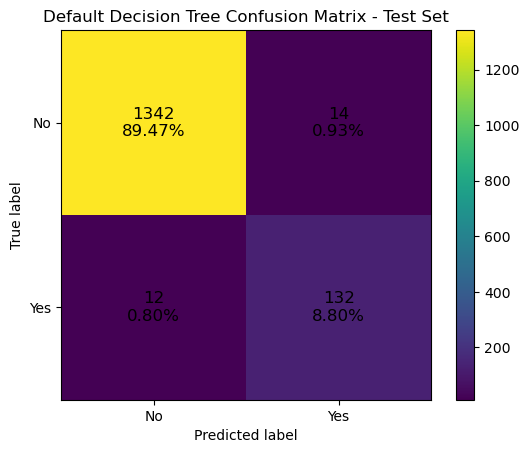

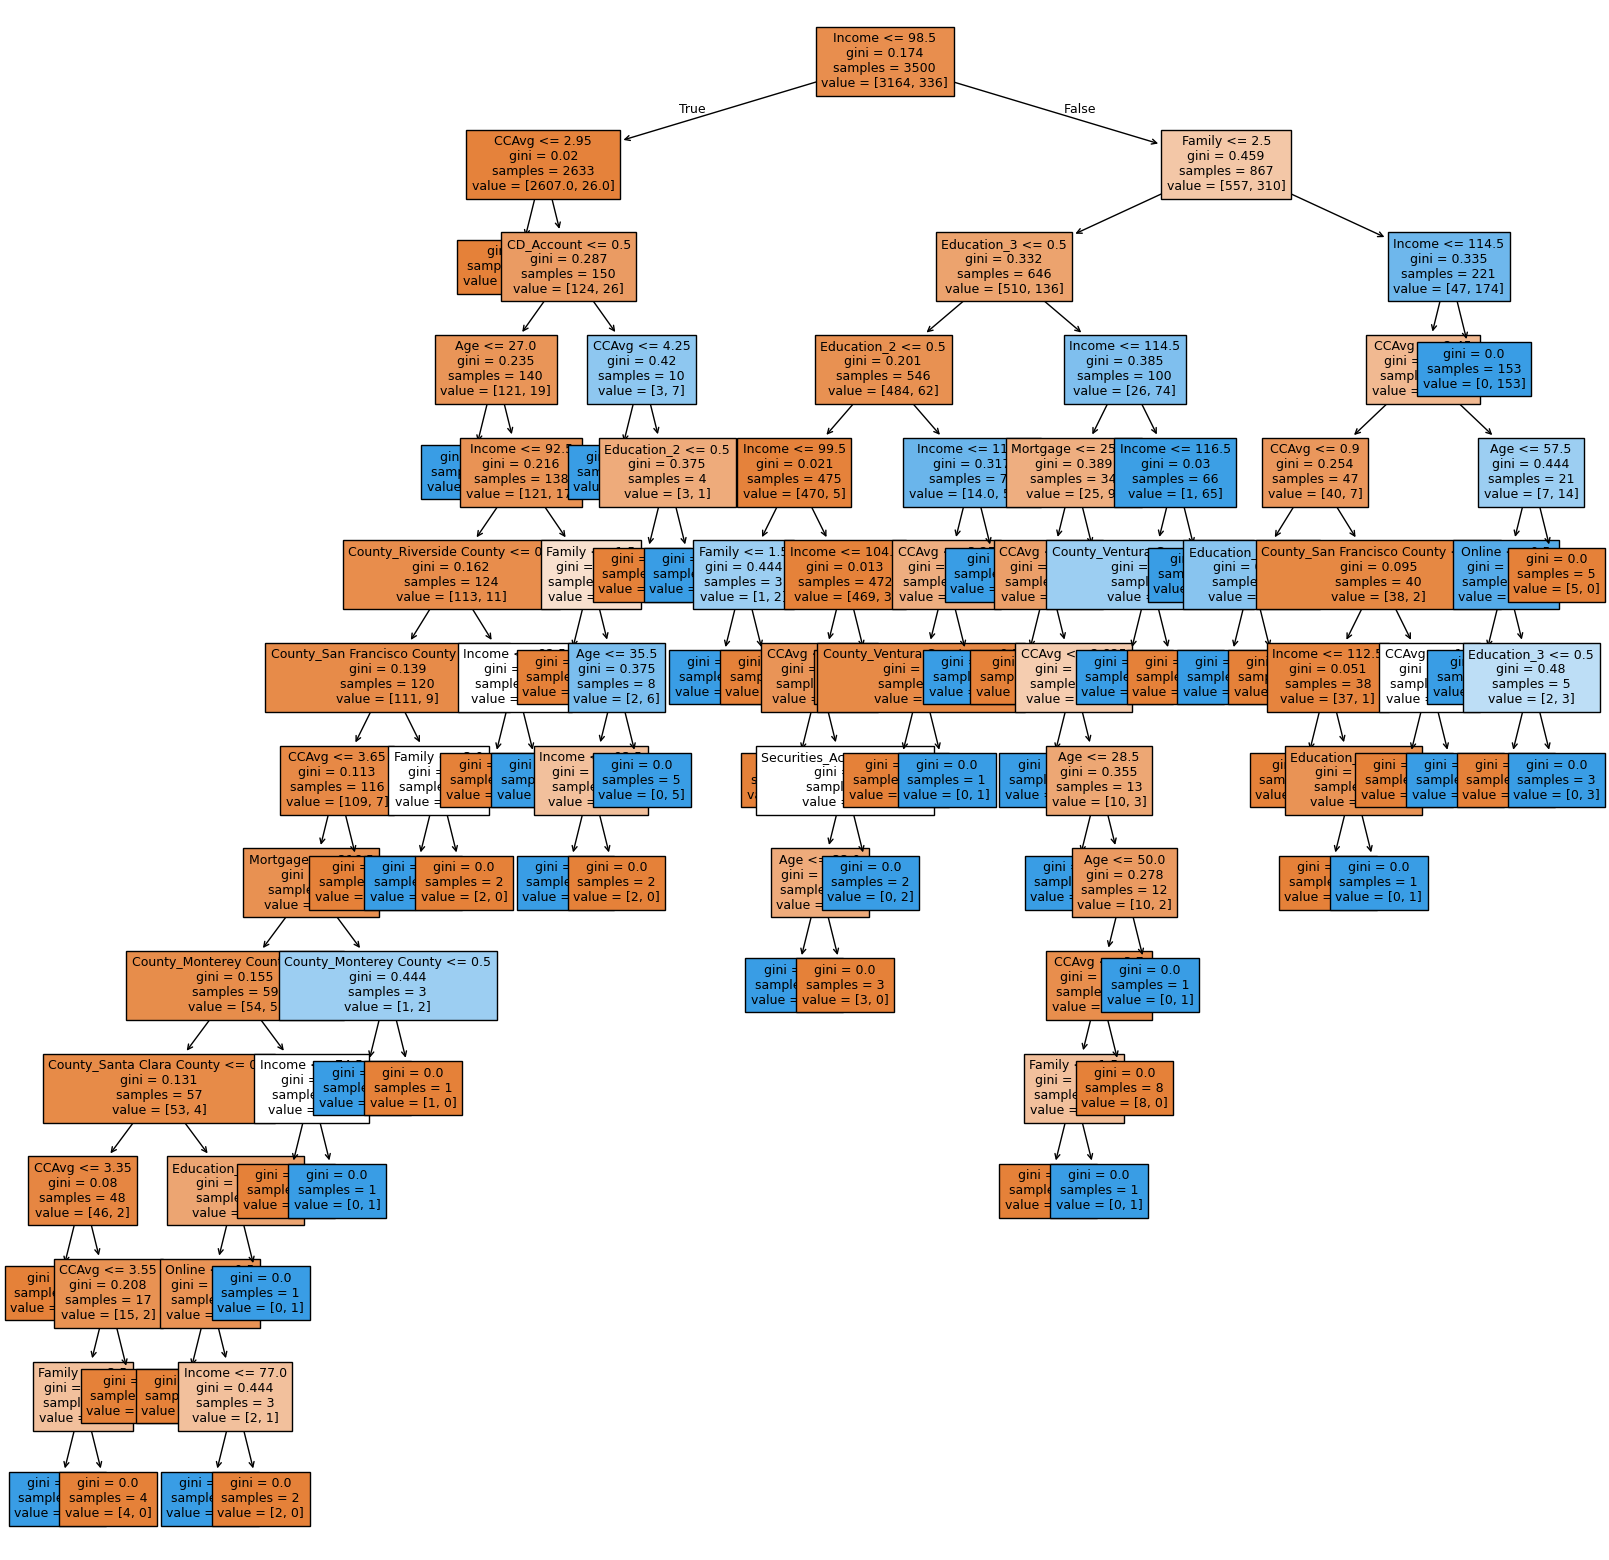

In [96]:
# Display the performance metrics, confusion matrix, and decision tree for the default decision tree classifier for the test set
display(performance_metrics(default_tree, X_test, y_test, dtree_name="Default Decision Tree - Test Set"))
display_confusion_matrix(default_tree, X_test, y_test, title="Default Decision Tree Confusion Matrix - Test Set")
draw_decision_tree(default_tree, X_test, y_test)

* The default model is very much over fit
* The performance of the model is slightly worse on the test set.
* Since the majority of the data that we are trying to predict against is heavily skewed towards customer without personal loans with the default model the majority of the predicted values are towards no to personal loan products.
* The resulting decision tree models on both the training and test set is extremely deep and complex.
* The model only correctly detects if a person will purchase a loan product less than 10% of the time.
* In both the training and test set the number of False Positives, and False Negatives is virtually 0.

### Model Evaluation Criterion

* To start we'll look at all the combinations of the hyper parameters in a chart looking at all the evaluation metrics which include accuracy, f1_score, recall, and precision



* Since the most important thing for this model to be able to predict is if the customer will purchase a personal loan product (True Positive), we will want to optimize any model improvements for the recall metric.
* The default decision tree is not optimized for recall which is why it only correctly predicts a True Positive less than 10% of the time.
* While recall is the most important metric we still still want to make sure to pick a model where F1 scoring, and accuracy is taken into account.

## Model Performance Improvement

### Pre Pruned Tree

* To see if we can improve performance we'll take a look at a pre-pruned tree where we optimize the tree to output against varying hyper parameters to maximize recall. We are choosing recall as stated previously because the most important thing for the model to predict correctly is if the customer will purchase a loan product.

Model  Node Count  Max Depth  \
0  Pre-Pruned Decision Tree - Training Set           7          2   

   Max Leaf Nodes  Min Samples Split  F1 Score  Accuracy Score  Recall Score  \
0               4                  5  0.475248           0.788           1.0   

   Precision Score  
0         0.311688

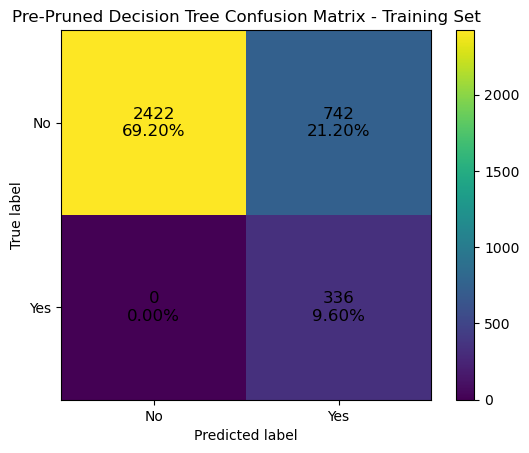

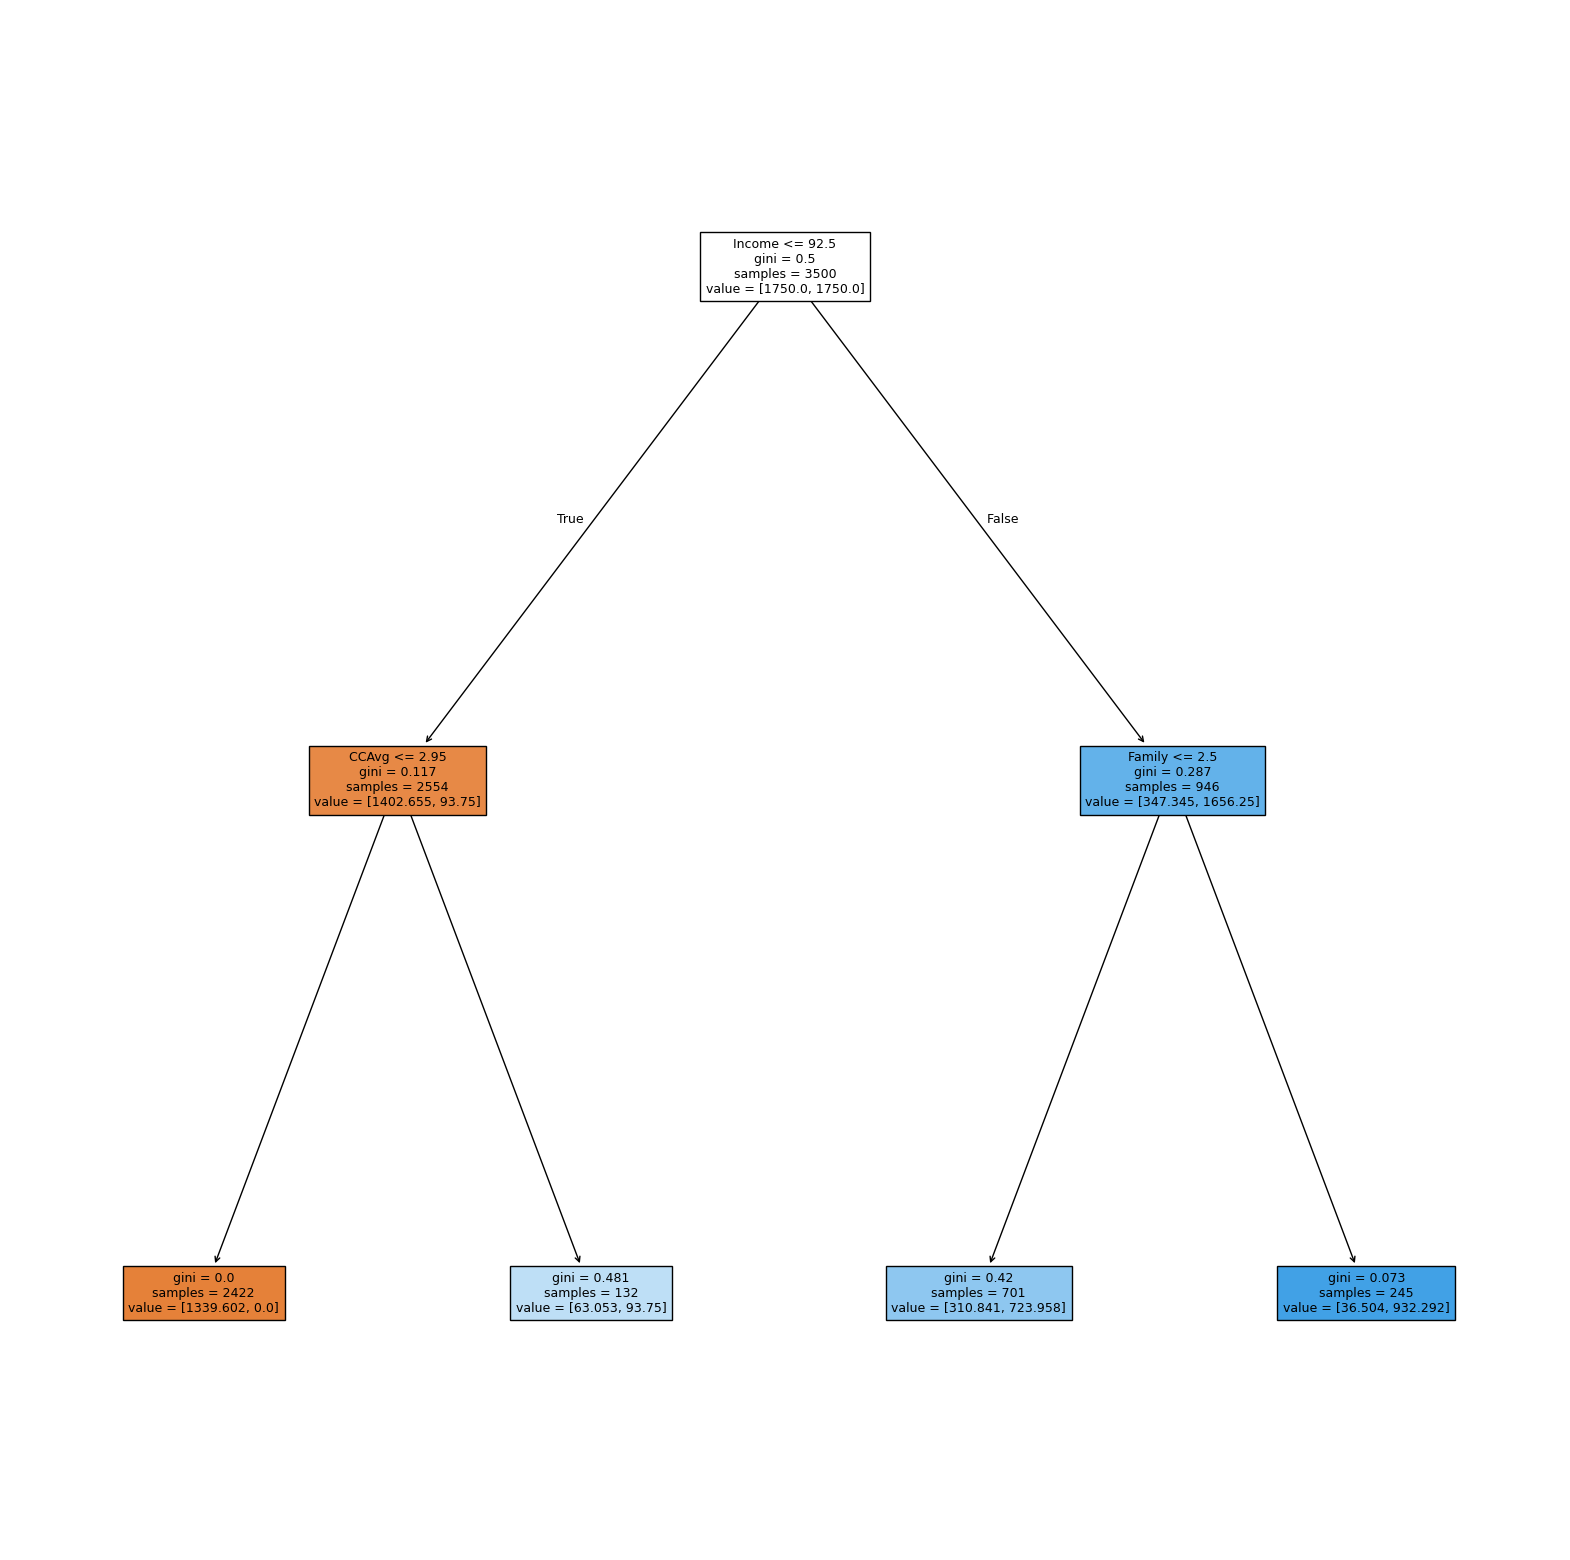

In [97]:
# Display tje performance metrics, confusion matrix, and decision tree for the pre-pruned decision tree classifier for the training set
display(performance_metrics(pre_pruned_tree, X_train, y_train, dtree_name="Pre-Pruned Decision Tree - Training Set"))
display_confusion_matrix(pre_pruned_tree, X_train, y_train, title="Pre-Pruned Decision Tree Confusion Matrix - Training Set")
draw_decision_tree(pre_pruned_tree, X_train, y_train)

Model  Node Count  Max Depth  Max Leaf Nodes  \
0  Pre Pruned Decision Tree - Test Set           7          2               4   

   Min Samples Split  F1 Score  Accuracy Score  Recall Score  Precision Score  
0                  5  0.471358        0.784667           1.0         0.308351

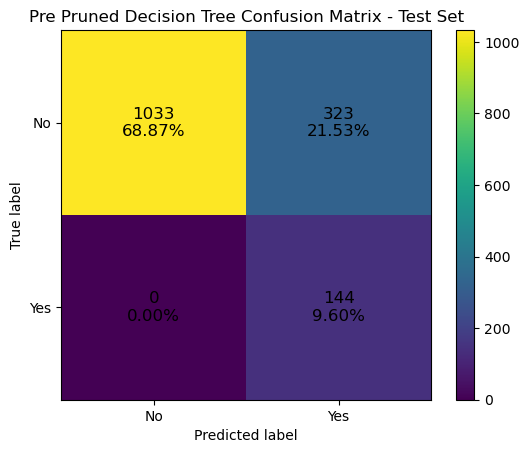

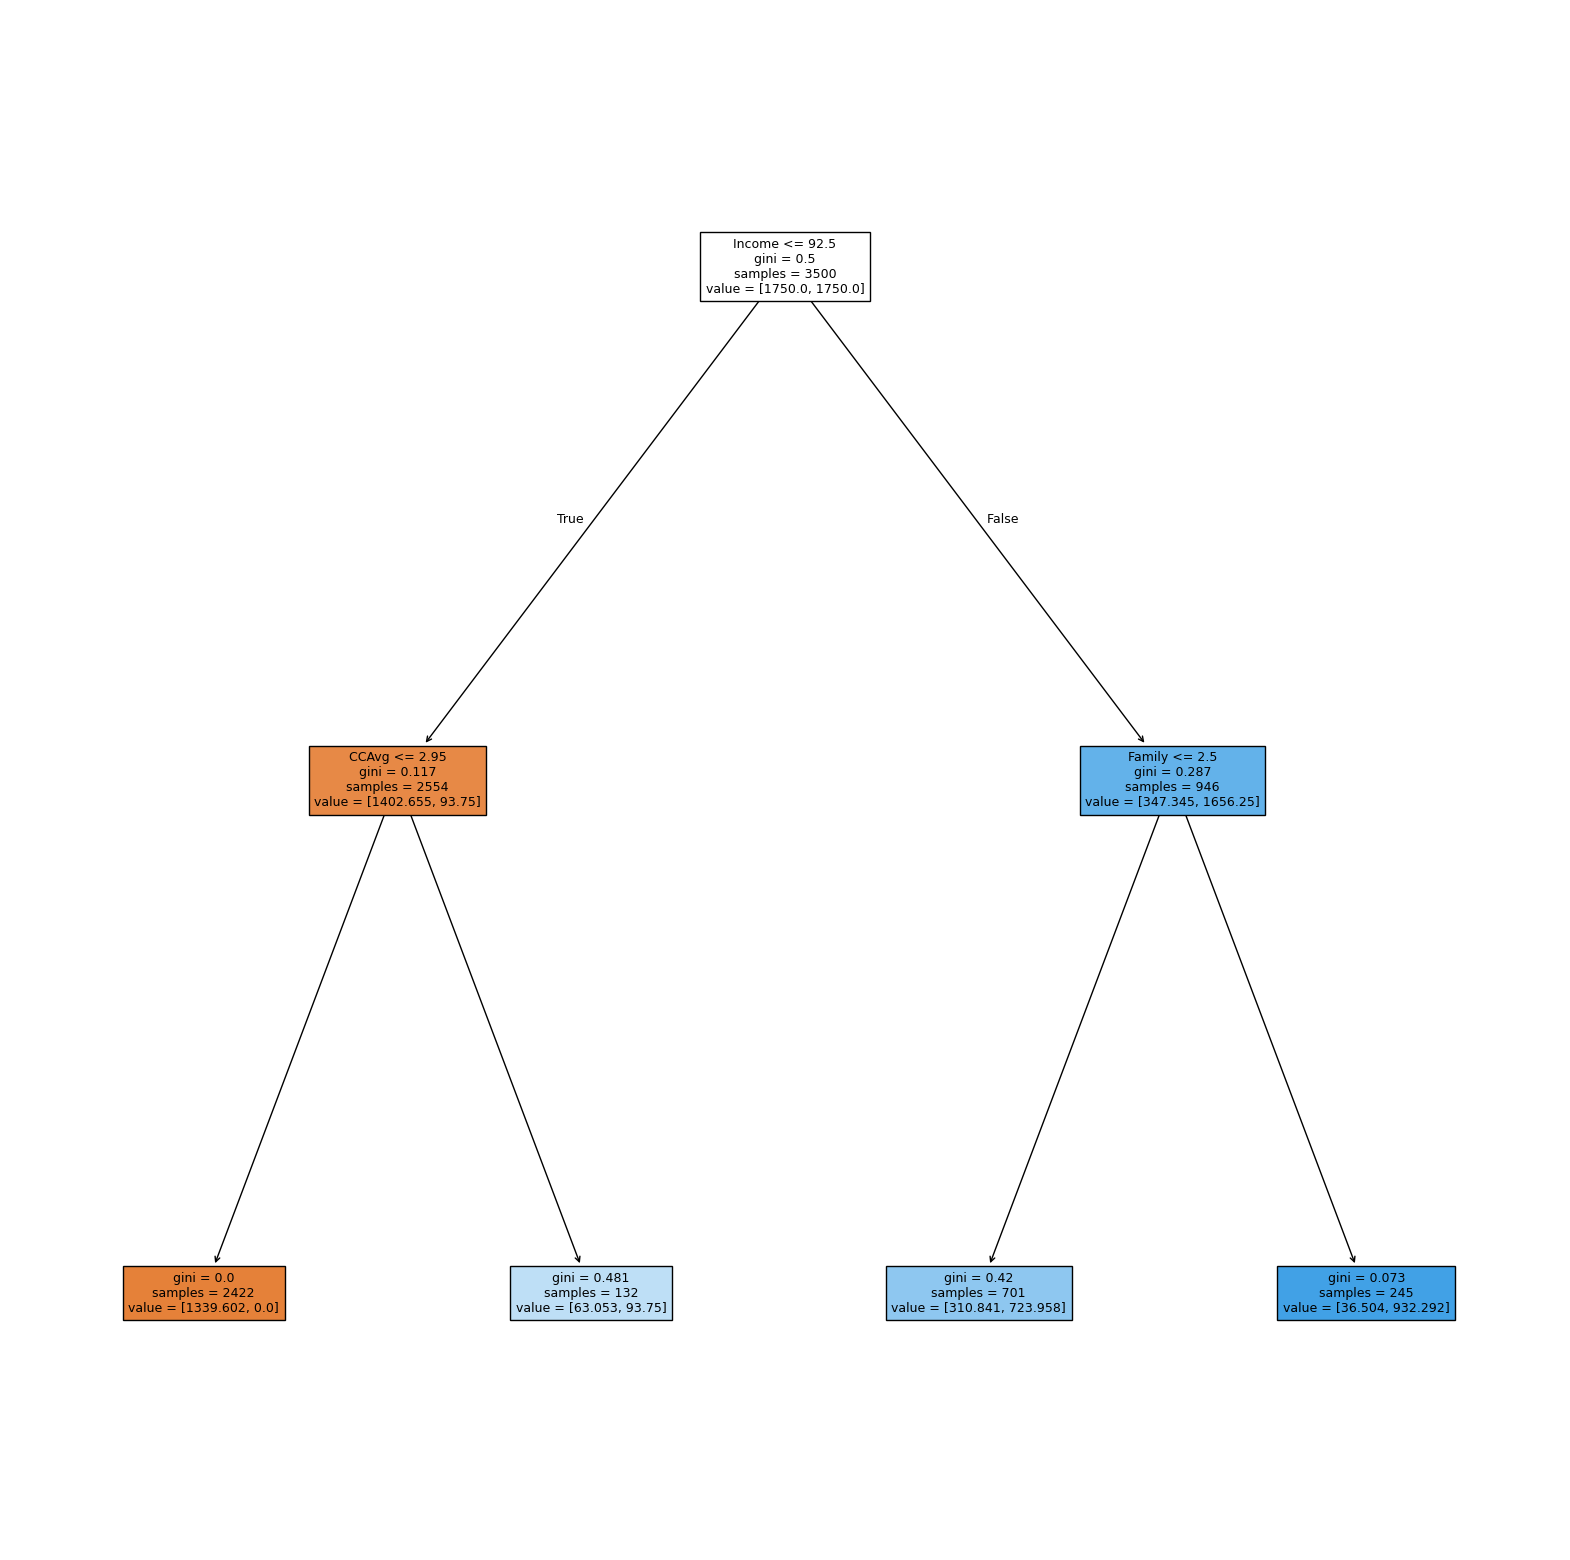

In [98]:
# Display the performance metrics, confusion matrix, and decision tree for the pre pruned decision tree classifier for the test set
display(performance_metrics(pre_pruned_tree, X_test, y_test, dtree_name="Pre Pruned Decision Tree - Test Set"))
display_confusion_matrix(pre_pruned_tree, X_test, y_test, title="Pre Pruned Decision Tree Confusion Matrix - Test Set")
draw_decision_tree(pre_pruned_tree, X_test, y_test)


* The pre pruned tree performs much worse on predicting NO for personal loans
* There is an increased number of false positives by about 21% which means more customers will be predicted to purchase a personal loan that actually won't
* The predicted value of Yes for personal loans performs a little better on the test set than the default decision tree by about 1%
* Accuracy, precision, and F1 scores have dropped significantly on both the training and test sets. This explains the increase in false positives.
* The pre-pruned however is significantly simplified, we can can begin to see that the important features are:
    * Income
    * CC AVG
    * Family
    * Income and CC AVG showing up on the list in this case lines up with the heatmap correlation
* While there is a reduction in the complexity we may be still leaving out important features that can help make our model more accurate.
 

### Post Pruned Tree

* To see if we can further improve performance we will try the last approach of post pruning the tree.
* The goal will be to achieve a simpler decision tree and try to come as close to a perfect recall while balancing the other performance parameters.

Model  Node Count  Max Depth  \
0  Post-Pruned Decision Tree - Training Set          21          6   

   Max Leaf Nodes  Min Samples Split  F1 Score  Accuracy Score  Recall Score  \
0              11                  2  0.760181        0.939429           1.0   

   Precision Score  
0         0.613139

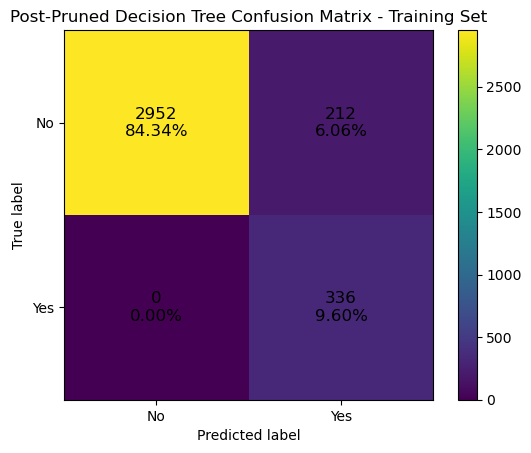

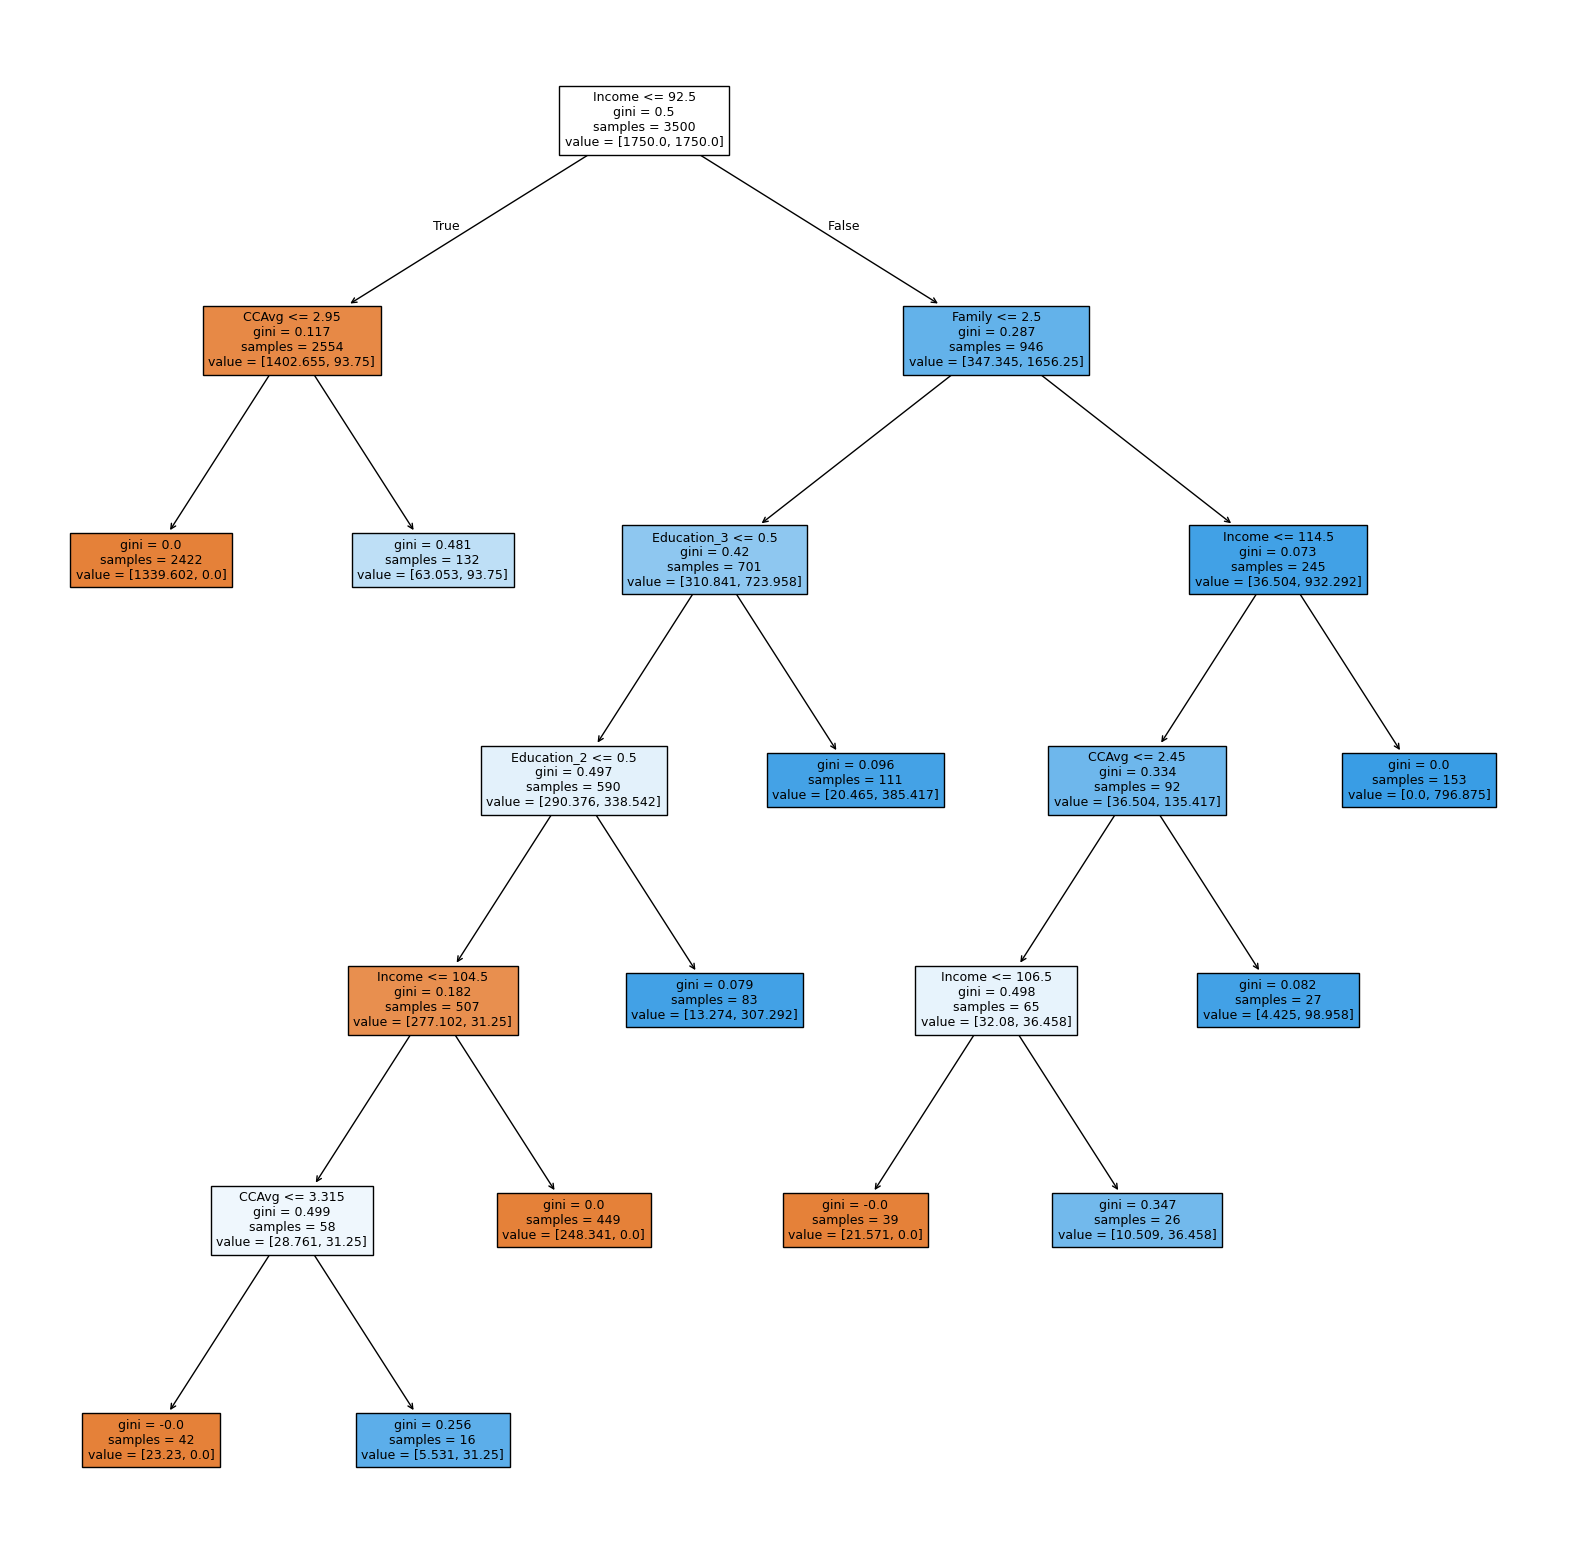

In [99]:
#Display the performance metrics, confusion matrix, and decision tree for the post-pruned decision tree classifier for the training set
display(performance_metrics(post_pruned_tree, X_train, y_train, dtree_name="Post-Pruned Decision Tree - Training Set"))
display_confusion_matrix(post_pruned_tree, X_train, y_train, title="Post-Pruned Decision Tree Confusion Matrix - Training Set")
draw_decision_tree(post_pruned_tree, X_train, y_train)

Model  Node Count  Max Depth  \
0  Post Pruned Decision Tree - Test Set          21          6   

   Max Leaf Nodes  Min Samples Split  F1 Score  Accuracy Score  Recall Score  \
0              11                  2  0.742268        0.933333           1.0   

   Precision Score  
0         0.590164

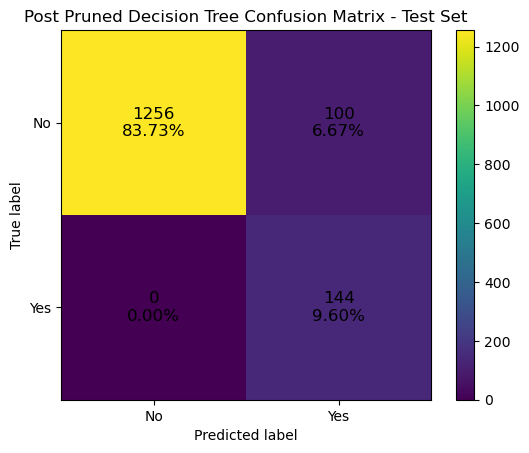

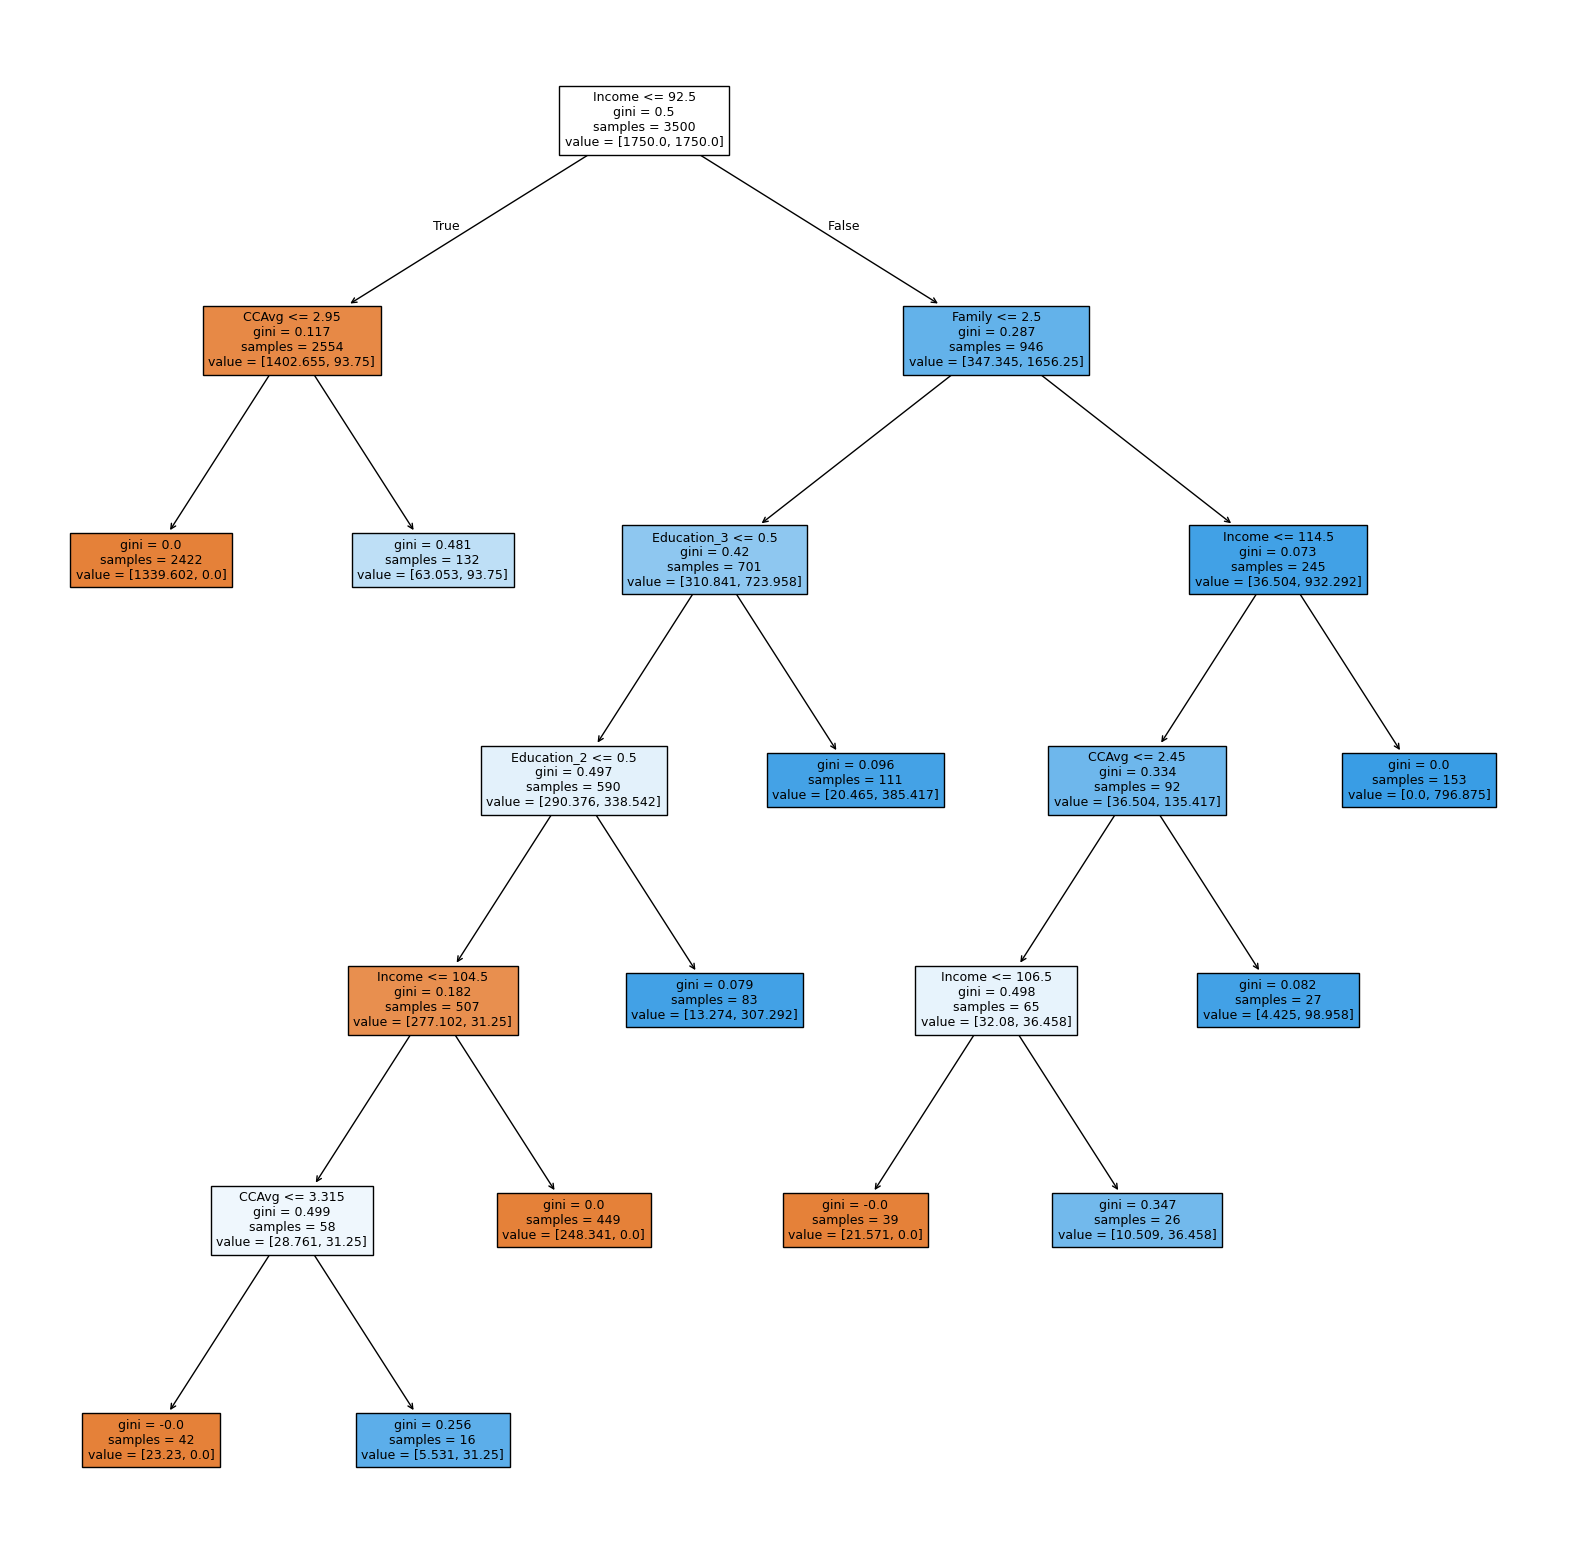

In [100]:
# Display the performance metrics, confusion matrix, and decision tree for the post pruned decision tree classifier for the test set
display(performance_metrics(post_pruned_tree, X_test, y_test, dtree_name="Post Pruned Decision Tree - Test Set"))
display_confusion_matrix(post_pruned_tree, X_test, y_test, title="Post Pruned Decision Tree Confusion Matrix - Test Set")
draw_decision_tree(post_pruned_tree, X_test, y_test)

* The post pruned model while having lower performance on True Negatives than the default tree it is still 20% better at correctly predicting No personal loan status that the pre-pruned tree
* The training and test set perform the same in terms of predicting Yes for personal loan status.
* The number of false positives is relatively low at ~6%
* The decision tree graph while slightly more complex is only minimal and gives insight into the important features which are:
    * Income
    * CC AVG
    * Family
    * Education
* It is still good to see that Income and CC AVG are heavy hitters when it comes to determining if a customer will purchase a personal loan product


## Model Performance Comparison and Final Model Selection

In [101]:
# Get the performance metrics for the default decision tree classifier with the training set
default_tree_train_metrics_df = performance_metrics(default_tree, X_train, y_train, dtree_name="Default Tree Train Set")

# Get the performance metrics for the default decision tree classifier with the test set
default_tree_test_metrics_df = performance_metrics(default_tree, X_test, y_test, dtree_name="Default Tree Test Set")

# Get the performance metrics for the pre-pruned tree with the training set
pre_pruned_tree_train_metrics_df = performance_metrics(pre_pruned_tree, X_train, y_train, dtree_name="Pre Pruned Tree Train Set")

# Get the performance metrics for the pre-pruned tree with the test set
pre_pruned_tree_test_metrics_df = performance_metrics(pre_pruned_tree, X_test, y_test, dtree_name="Pre Pruned Tree Test Set")

# Get the performance metrics for the post-pruned tree with the training set
post_pruned_tree_train_metrics_df = performance_metrics(post_pruned_tree, X_train, y_train, dtree_name="Post Pruned Tree Train Set")

# Get the performance metrics for the post-pruned tree with the test set
post_pruned_tree_test_metrics_df = performance_metrics(post_pruned_tree, X_test, y_test, dtree_name="Post Pruned Tree Test Set")

tree_metrics_frame_list = [
    default_tree_train_metrics_df,
    default_tree_test_metrics_df,
    pre_pruned_tree_train_metrics_df,
    pre_pruned_tree_test_metrics_df,
    post_pruned_tree_train_metrics_df,
    post_pruned_tree_test_metrics_df
]

tree_metrics = pd.concat(tree_metrics_frame_list,ignore_index=True)
display(tree_metrics.T)

0                      1  \
Model              Default Tree Train Set  Default Tree Test Set   
Node Count                            119                    119   
Max Depth                              14                     14   
Max Leaf Nodes                         60                     60   
Min Samples Split                       2                      2   
F1 Score                              1.0               0.910345   
Accuracy Score                        1.0               0.982667   
Recall Score                          1.0               0.916667   
Precision Score                       1.0                0.90411   

                                           2                         3  \
Model              Pre Pruned Tree Train Set  Pre Pruned Tree Test Set   
Node Count                                 7                         7   
Max Depth                                  2                         2   
Max Leaf Nodes                             4                         4   
Min Samples Split                          5                         5   
F1 Score                            0.475248                  0.471358   
Accuracy Score                         0.788                  0.784667   
Recall Score                             1.0                       1.0   
Precision Score                     0.311688                  0.308351   

                                            4                          5  
Model              Post Pruned Tree Train Set  Post Pruned Tree Test Set  
Node Count                                 21                         21  
Max Depth                                   6                          6  
Max Leaf Nodes                             11                         11  
Min Samples Split                           2                          2  
F1 Score                             0.760181                   0.742268  
Accuracy Score                       0.939429                   0.933333  
Recall Score                              1.0                        1.0  
Precision Score                      0.613139                   0.590164

* The model that has the best overall performance metrics across Recall, F1, Precision, and Accuracy is the Post Pruned model.
* The model while only being slightly more complex than the pre-pruned models incorporates more key features to get a better prediction.
* While the perfect recall score of 1.0 is ideal, it was important to choose a model that was able to maximize other values of well. The biggest risk with this model is that while it will nearly 100% of the time identify a customer who will get a personal loan product, it also has a higher risk of false positives which are customers that are predicted to get a personal loan product but don't.
* It was interesting to see that the location by county didn't really show up in any of the models except the default tree.
* The thing, however, is that while we have good performance we could potentially do better if we had a data set where there were more users who have personal loan products. This data set is heavily skewed towards customers who do not so we have less opportunity to see if there are other factors that could be at play to determine a customer's personal loan status.


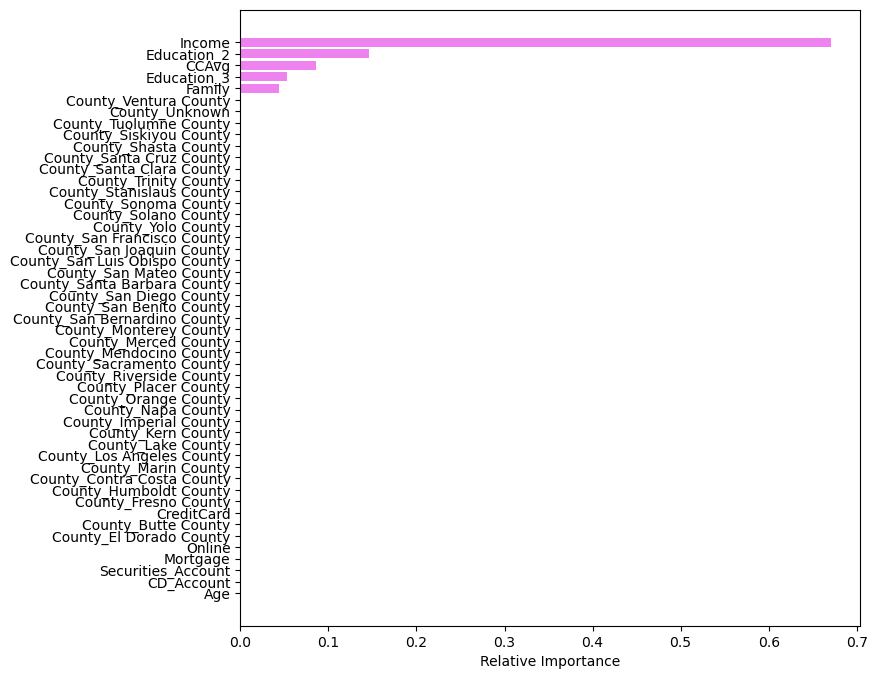

In [102]:
# importance of features in the tree building
feature_names = list(X_train.columns)

importances = post_pruned_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))

plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Business Recommendations


* What recommendations would you suggest to the bank?

* The decision tree graph while slightly more complex is only minimal and gives insight into the important features which are:
    * Income
    * CC AVG
    * Family
    * Education
* County didn't really factor into the key features at all.
* After inspecting the zip codes and reducing them to more manageable categories by county the following was observed:
    * All 5000 zip code are within the state of California, so this would be a good region to launch a focused market campaign to offer loan products to customers here.
    * Within the state of California, your top 5 counties with the largest concentration of customers are:
        * Los Angeles County
        * San Diego County
        * Santa Clara County
        * Alameda County
        * Orange County
    * If you want to further target marketing efforts within the state you can start with these 5 counties as this is where you will see the most benefit and have the largest opportunity to convert more customers to personal loan products.
* Note that even with the post pruned decision tree that there is still potential for false positives. So the question to the business is it it sufficient to have marketing dolalrs go to some percentage of customers that still won't purchase a personal loan product.


In [103]:
# Export the project to HTML

!jupyter nbconvert --to html "ErnestHolloway-AIML_ML_Project_full_code_notebook-6-2-25.ipynb"

[NbConvertApp] Converting notebook ErnestHolloway-AIML_ML_Project_full_code_notebook-6-2-25.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 37 image(s).
[NbConvertApp] Writing 6023121 bytes to ErnestHolloway-AIML_ML_Project_full_code_notebook-6-2-25.html


___